<a href="https://colab.research.google.com/github/Afsalmc/football_match_prediction/blob/master/model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model implementation for football outcome prediction

Model based on Corentin Herbinet's paper : Predicting Football Resuts Using Machine Learning Techniques

Path have to be modified in cells 2, 3

In [1]:
#packages
import sqlite3
import pandas as pd
from lxml import etree, objectify
import csv
import math
from math import isnan
import numpy as np
import seaborn as sns

In [2]:
!git clone https://gitlab.com/afsalrahman51/football-results-prediction.git
!mv football-results-prediction/database.sqlite.zip .
!unzip database.sqlite.zip

Cloning into 'football-results-prediction'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 54 (delta 3), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (54/54), done.
Archive:  database.sqlite.zip
  inflating: database.sqlite         


In [3]:
#Import database
with sqlite3.connect('database.sqlite') as con: #path to modify
    match = "SELECT * FROM Match"
    country = "SELECT * FROM Country"
    league = "SELECT * FROM League"
    player = "SELECT * FROM Player"
    player_attributes = "SELECT * FROM Player_Attributes"
    team = "SELECT * FROM Team"
    match_data = pd.read_sql_query(match, con)
    country_data = pd.read_sql_query(country, con)
    league_data = pd.read_sql_query(league, con)
    player_data = pd.read_sql_query(player, con)
    player_attributes_data = pd.read_sql_query(player_attributes, con)
    team_data = pd.read_sql_query(team, con)

In [4]:
#paths to modify
shot_on = pd.read_csv('/content/football-results-prediction/Data/shoton_detail.csv')
shot_off = pd.read_csv('/content/football-results-prediction/Data/shotoff_detail.csv')
goals = pd.read_csv('/content/football-results-prediction/Data/goal_detail.csv')
possession = pd.read_csv('/content/football-results-prediction/Data/possession_detail.csv')
cards = pd.read_csv('/content/football-results-prediction/Data/card_detail.csv')
corners = pd.read_csv('/content/football-results-prediction/Data/corner_detail.csv')
crosses = pd.read_csv('/content/football-results-prediction/Data/cross_detail.csv')
fouls = pd.read_csv('/content/football-results-prediction/Data/foulcommit_detail.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,7,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py

In [5]:
match_data.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
shot_off.head()

,card_type,coordinates,del,elapsed,elapsed_plus,event_incident_typefk,id,match_id,n,player1,pos_x,pos_y,shotoff,sortorder,stats,subtype,team,type,value
0,NaN,NaN,NaN,4,NaN,9,378835,1729,264,30373.0,NaN,NaN,NaN,1,NaN,distance,10260.0,shotoff,NaN
1,NaN,NaN,NaN,5,NaN,9,378845,1729,257,37799.0,NaN,NaN,NaN,2,NaN,distance,10261.0,shotoff,NaN
2,NaN,NaN,NaN,22,NaN,317,378995,1729,269,24228.0,NaN,NaN,NaN,3,NaN,deflected,10261.0,shotoff,NaN
3,NaN,NaN,NaN,31,NaN,9,379075,1729,278,38807.0,NaN,NaN,NaN,0,NaN,distance,10261.0,shotoff,NaN
4,NaN,NaN,NaN,34,NaN,47,379111,1729,281,24154.0,NaN,NaN,NaN,2,NaN,header,10260.0,shotoff,NaN


In [7]:
#useful features for shots
shot_features = ['type', 'subtype','team','pos_x', 'pos_y', 'elapsed', 'match_id', 'id', 'player1']
shot_off = shot_off[shot_features]
shot_on = shot_on[shot_features]

In [8]:
#useful features for possession
possession_features = ['homepos', 'awaypos', 'elapsed', 'match_id', 'id', 'type', 'subtype']
possession = possession[possession_features]

In [9]:
match_data

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#useful features for goals
goals_features = ['elapsed', 'id', 'match_id', 'team', 'pos_x', 'pos_y', 'player1', 'player2', 'subtype', 'comment']
goals = goals[goals_features]

In [11]:
#league_data_table
league_data

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [12]:
#Model based on season 2014/2015 and 2015/2016
#Model build for 5 championship : England, Spain, Germany, Italy and France
seasons_studied = ['2014/2015', '2015/2016']
league_studied = [1729, 4769, 7809, 10257] #league_id of our five championships selected
new_match_data = match_data[(match_data.season.isin(seasons_studied)) & (match_data.league_id.isin(league_studied))]
new_match_data.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
4008,4009,1729,1729,2014/2015,1,2014-08-16 00:00:00,1723982,9825,9826,2,...,12.00,1.25,6.25,10.5,NaN,NaN,NaN,NaN,NaN,NaN
4009,4010,1729,1729,2014/2015,1,2014-08-18 00:00:00,1723983,8191,8455,1,...,1.40,10.00,4.80,1.4,NaN,NaN,NaN,NaN,NaN,NaN
4010,4011,1729,1729,2014/2015,1,2014-08-16 00:00:00,1723984,8197,8668,2,...,2.38,3.20,3.40,2.4,NaN,NaN,NaN,NaN,NaN,NaN
4011,4012,1729,1729,2014/2015,1,2014-08-17 00:00:00,1723985,8650,8466,2,...,8.50,1.36,5.25,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4012,4013,1729,1729,2014/2015,1,2014-08-16 00:00:00,1723986,10260,10003,1,...,8.00,1.36,5.20,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#keep id of selected matchs
match_id = new_match_data['id']

In [14]:
#update of statistic DataFrames with selected matchs
shot_on  = shot_on[shot_on.match_id.isin(match_id)]
shot_off  = shot_off[shot_off.match_id.isin(match_id)]
possession = possession[possession.match_id.isin(match_id)]
goals = goals[goals.match_id.isin(match_id)]

In [15]:
#detect missing possession
#if missing ==> 50/50 for each team
res = possession.homepos.isna().sum()
print('missing possession : ', res)

print('--> so substitution...')

for i in possession.index : 
    if isnan(possession.loc[i, 'homepos']) == True :
        possession.loc[i, 'homepos'] = 50
        possession.loc[i, 'awaypos'] = 50

missing possession :  7
--> so substitution...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
#add home_team & away_team columns to possession dataframe
#ajout des colonnes home_team & away_team à possession
teams_possession = new_match_data[new_match_data.id.isin(match_id)][['id', 'home_team_api_id', 'away_team_api_id']]


home_team = []
away_team = []

for i in possession.index :
    match_id = possession.loc[i, 'match_id']
    home_team_id = int(teams_possession[teams_possession.id == match_id]['home_team_api_id'])
    away_team_id = int(teams_possession[teams_possession.id == match_id]['away_team_api_id'])
    
    home_team.append(home_team_id)
    away_team.append(away_team_id) 
    
possession['home_team_id'] = home_team
possession['away_team_id'] = away_team

In [17]:
possession.head()

,homepos,awaypos,elapsed,match_id,id,type,subtype,home_team_id,away_team_id
9252,78.0,22.0,24,4009,3647521,special,possession,9825,9826
9253,74.0,26.0,45,4009,3647655,special,possession,9825,9826
9254,75.0,25.0,66,4009,3647956,special,possession,9825,9826
9255,77.0,23.0,90,4009,3648227,special,possession,9825,9826
9256,35.0,65.0,23,4010,3652653,special,possession,8191,8455


In [18]:
#detect missing possessions for shots
res = shot_on.pos_x.isna().sum()
print('position des tirs cadrés manquantes : ', res)
res = shot_off.pos_x.isna().sum()
print('position des tirs non cadrés manquantes : ', res)

position des tirs cadrés manquantes :  36
position des tirs non cadrés manquantes :  21


shots distance are set for each side of the pitch... So, we calculate the real distance for shots which are on one of the other side

In [19]:
print(min(shot_off.pos_y))
print(max(shot_off.pos_y))
print(min(shot_off.pos_x))
print(max(shot_off.pos_x))

1.0
69.0
2.0
45.0


middle is set to 35 on y axis
middle is set to 22.5 on x axis

In [20]:
def reverse_shot(y) :
    
    #reverse on y axis
    if y > 35 :
        y = 35 - (y - 35)
        
    return y

In [21]:
shot_off.pos_y = shot_off.pos_y.apply(lambda x : reverse_shot(x))
shot_on.pos_y = shot_on.pos_y.apply(lambda x : reverse_shot(x))
goals.pos_y = goals.pos_y.apply(lambda x : reverse_shot(x))

In [22]:
#Calculate distance and angle from the shot position to the goal
#goal coordinates are (0,23)

def shot_distance(x, y) : 
    
    dist = math.sqrt(x**2 + (y-23)**2)
    return dist

def shot_angle(x, y) :
    
    angle = np.arctan(abs(y-23)/x)
    return angle

In [23]:
#add two columns(distance and angle) in shots dataframe
pos_x_shoton = list(shot_on['pos_x'])
pos_y_shoton = list(shot_on['pos_y'])

distance = []
angle = []
for x, y in zip(pos_x_shoton, pos_y_shoton) : 
    dist = shot_distance(x,y)
    ang = shot_angle(x,y)
    distance.append(dist)
    angle.append(ang)
    
shot_on['distance'] = distance
shot_on['angle'] = angle



pos_x_shotoff = list(shot_off['pos_x'])
pos_y_shotoff = list(shot_off['pos_y'])

distance = []
angle = []
for x, y in zip(pos_x_shotoff, pos_y_shotoff) : 
    dist = shot_distance(x,y)
    ang = shot_angle(x,y)
    distance.append(dist)
    angle.append(ang)
    
shot_off['distance'] = distance
shot_off['angle'] = angle


pos_x_goals = list(goals['pos_x'])
pos_y_goals = list(goals['pos_y'])

distance = []
angle = []
for x, y in zip(pos_x_goals, pos_y_goals) : 
    dist = shot_distance(x,y)
    ang = shot_angle(x,y)
    distance.append(dist)
    angle.append(ang)
    
goals['distance'] = distance
goals['angle'] = angle

In [24]:
shot_off

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle
27791,shotoff,lob,9825.0,20.0,14.0,16,4009,3647440,50047.0,21.931712,0.422854
27792,shotoff,header,9825.0,18.0,6.0,30,4009,3647543,50047.0,24.758837,0.756835
27793,shotoff,deflected,9825.0,29.0,13.0,37,4009,3647579,37436.0,30.675723,0.332059
27794,shotoff,direct_freekick,9825.0,5.0,6.0,78,4009,3648054,50047.0,17.720045,1.284745
27795,shotoff,shot,9825.0,17.0,4.0,84,4009,3648118,46469.0,25.495098,0.840897
...,...,...,...,...,...,...,...,...,...,...,...
73960,shotoff,deflected,9891.0,40.0,11.0,80,13273,4953870,27708.0,41.761226,0.291457
73961,shotoff,header,9891.0,29.0,3.0,84,13273,4953935,182715.0,35.227830,0.603749
73962,shotoff,big chance shot,8600.0,29.0,6.0,87,13273,4954015,401095.0,33.615473,0.530216
73963,shotoff,distance,9891.0,33.0,15.0,90,13273,4954098,181921.0,33.955854,0.237836


# Some descriptive statistics

shot_off

In [25]:
shot_off.head()

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle
27791,shotoff,lob,9825.0,20.0,14.0,16,4009,3647440,50047.0,21.931712,0.422854
27792,shotoff,header,9825.0,18.0,6.0,30,4009,3647543,50047.0,24.758837,0.756835
27793,shotoff,deflected,9825.0,29.0,13.0,37,4009,3647579,37436.0,30.675723,0.332059
27794,shotoff,direct_freekick,9825.0,5.0,6.0,78,4009,3648054,50047.0,17.720045,1.284745
27795,shotoff,shot,9825.0,17.0,4.0,84,4009,3648118,46469.0,25.495098,0.840897


Shots type distribution

In [26]:
#quantity of missing subtypes for shots
shot_off.subtype.isna().sum()

11

distribution

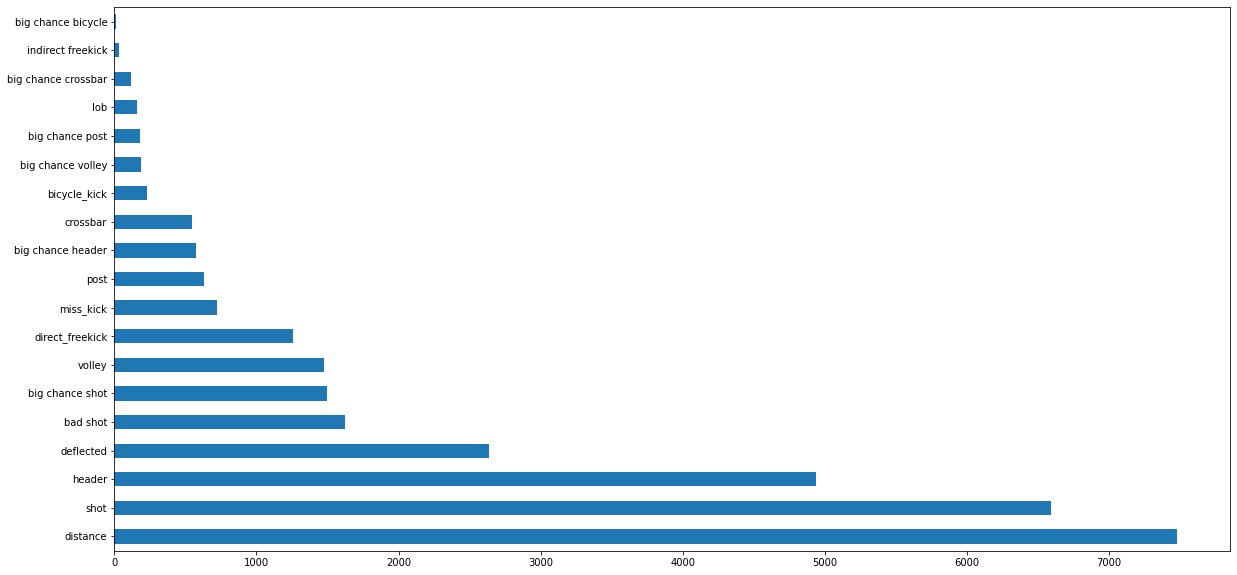

In [27]:
shot_off['subtype'].value_counts().head(30).plot(kind='barh', figsize = (20,10))

Posittion on the pitch

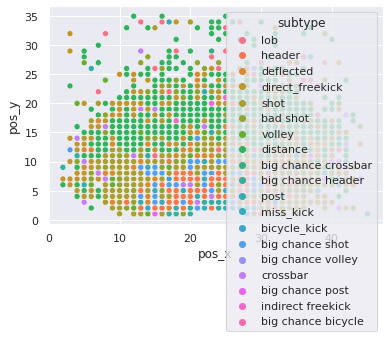

In [28]:
sns.set()


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="pos_x", y="pos_y",
                     hue="subtype",
                      sizes=(200, 200),
                     data=shot_off)

mean position of the pitch according the subtype

In [29]:
mean_subtype = shot_off.groupby('subtype').mean()
mean_subtype['subtype'] = mean_subtype.index


count_subtype = shot_off.groupby('subtype').count()
count_subtype['subtype'] = count_subtype.index

mean_subtype['count'] = count_subtype.id

In [30]:
mean_subtype.head()

,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle,subtype,count
subtype,,,,,,,,,,,
bad shot,9966.729796,23.132716,12.516667,49.061614,8616.375847,4.560128e+06,158645.206663,25.987228,0.448004,bad shot,1623
bicycle_kick,9939.330396,23.268722,7.872247,49.555066,8513.299559,4.577461e+06,136867.008811,27.974512,0.588036,bicycle_kick,227
big chance bicycle,9077.300000,22.700000,6.300000,39.200000,8851.000000,4.415674e+06,74306.000000,28.286563,0.643374,big chance bicycle,10
big chance crossbar,9146.710526,22.447368,7.675439,48.956140,8450.324561,4.563351e+06,161415.815789,27.619117,0.616561,big chance crossbar,114
big chance header,10551.357639,23.159722,5.434028,51.391681,8737.344887,4.648599e+06,146220.178819,29.167231,0.654683,big chance header,577


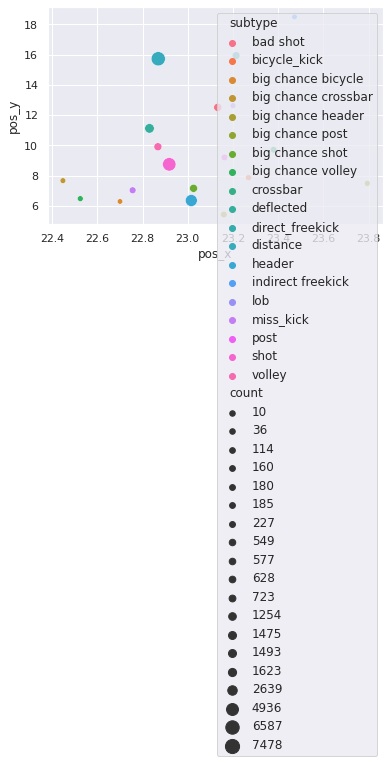

In [31]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="pos_x", y="pos_y",
                     hue="subtype", size = 'count',
                      sizes=(30, 200),
                     data=mean_subtype, legend = 'full')

In [32]:
shot_on.head()

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle
27327,shoton,blocked_shot,9825.0,24.0,14.0,9,4009,3647350,75489.0,25.632011,0.358771
27328,shoton,distance,9825.0,34.0,13.0,27,4009,3647529,192921.0,35.440090,0.286051
27329,shoton,shot,9825.0,20.0,13.0,30,4009,3647540,143793.0,22.360680,0.463648
27330,shoton,blocked_shot,9826.0,13.0,24.0,34,4009,3647565,25537.0,13.038405,0.076772
27331,shoton,blocked_shot,9825.0,17.0,14.0,39,4009,3647592,75489.0,19.235384,0.486899


In [33]:
goals.head()

,elapsed,id,match_id,team,pos_x,pos_y,player1,player2,subtype,comment,distance,angle
6548,35,3647567,4009,9826.0,18.0,3.0,26777.0,35345.0,header,n,26.907248,0.837981
6549,45,3647657,4009,9825.0,21.0,5.0,46539.0,50047.0,header,n,27.658633,0.708626
6550,90,3648213,4009,9825.0,21.0,2.0,75489.0,NaN,tap_in,n,29.698485,0.785398
6551,14,3652629,4010,8191.0,32.0,10.0,37240.0,24372.0,shot,n,34.539832,0.385883
6552,17,3652637,4010,8455.0,26.0,6.0,19243.0,NaN,loose_ball,n,31.064449,0.579074


# Modelisation Xg shot

In [34]:
#dictionnary to create new categories of shots(larger)

shot_category = {}

shot_category['header'] = 'header'
shot_category['loose_ball'] = 'normal_shots'
shot_category['shot'] = 'normal_shots'
shot_category['crossbar'] = 'normal_shots'
shot_category['saved'] = 'normal_shots'
shot_category['post'] = 'normal_shots'
shot_category['direct_freekick'] = 'direct_free_kicks'
shot_category['tap_in'] = 'normal_shots'
shot_category['missed'] = 'normal_shots'
shot_category['big chance header'] = 'header'
shot_category['big chance shot'] = 'normal_shots'
shot_category['indirect freekick'] = 'indirect_free_kicks'
shot_category['deflected'] = 'normal_shots'
shot_category['bad shot'] = 'normal_shots'
shot_category['big chance crossbar'] = 'normal_shots'
shot_category['big chance post'] = 'normal_shots'
shot_category['saved_back_into_play'] = 'normal_shots'
shot_category['miss_kick'] = 'normal_shots'
shot_category['lob'] = 'normal_shots'
shot_category['blocked_shot'] = 'normal_shots'
shot_category['blocked_header'] = 'header'
shot_category['big chance bicycle'] = 'bicycle_kicks'
shot_category['volley'] = 'volley'
shot_category['big chance volley'] = 'volley'
shot_category['distance'] = 'normal_shots'
shot_category['backheel'] = 'normal_shots'
shot_category['big chance blocked'] = 'normal_shots'
shot_category['bicycle_kick'] = 'bicycle_kicks'

In [35]:
#creta a new column outcome. 1 for a goal, 0 for a missing shot
goals['outcome'] = 1

shot_on['outcome'] = 0

shot_off['outcome'] = 0

In [36]:
shot_off.head()

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle,outcome
27791,shotoff,lob,9825.0,20.0,14.0,16,4009,3647440,50047.0,21.931712,0.422854,0
27792,shotoff,header,9825.0,18.0,6.0,30,4009,3647543,50047.0,24.758837,0.756835,0
27793,shotoff,deflected,9825.0,29.0,13.0,37,4009,3647579,37436.0,30.675723,0.332059,0
27794,shotoff,direct_freekick,9825.0,5.0,6.0,78,4009,3648054,50047.0,17.720045,1.284745,0
27795,shotoff,shot,9825.0,17.0,4.0,84,4009,3648118,46469.0,25.495098,0.840897,0


In [37]:
#modify subtypes for larger subtypes
new_subtypes = []
subtypes = list(goals['subtype'])
for subtype in subtypes :
    if type(subtype) == str :
        new_subtypes.append(shot_category[subtype])
    else : 
        new_subtypes.append('normal_shots')
        
goals['new_subtype'] = new_subtypes

new_subtypes = []
subtypes = list(shot_on['subtype'])
for subtype in subtypes :
    if type(subtype) == str :
        new_subtypes.append(shot_category[subtype])
    else : 
        new_subtypes.append('normal_shots')
        
shot_on['new_subtype'] = new_subtypes

new_subtypes = []
subtypes = list(shot_off['subtype'])
for subtype in subtypes :
    if type(subtype) == str :
        new_subtypes.append(shot_category[subtype])
    else : 
        new_subtypes.append('normal_shots')
        
shot_off['new_subtype'] = new_subtypes

goals.head()

,elapsed,id,match_id,team,pos_x,pos_y,player1,player2,subtype,comment,distance,angle,outcome,new_subtype
6548,35,3647567,4009,9826.0,18.0,3.0,26777.0,35345.0,header,n,26.907248,0.837981,1,header
6549,45,3647657,4009,9825.0,21.0,5.0,46539.0,50047.0,header,n,27.658633,0.708626,1,header
6550,90,3648213,4009,9825.0,21.0,2.0,75489.0,NaN,tap_in,n,29.698485,0.785398,1,normal_shots
6551,14,3652629,4010,8191.0,32.0,10.0,37240.0,24372.0,shot,n,34.539832,0.385883,1,normal_shots
6552,17,3652637,4010,8455.0,26.0,6.0,19243.0,NaN,loose_ball,n,31.064449,0.579074,1,normal_shots


**Classification models for Xgoals** 


ONE model is created for each shot subtype

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
#create X and Y vectors to fit models
x_features = ['new_subtype', 'distance', 'angle', 'pos_x', 'pos_y']
y_features = ['outcome']


#feature creation
x_shot_on = shot_on#[x_features]
x_shot_off = shot_off#[x_features]
x_goals = goals#[x_features]
X = pd.concat([x_shot_on, x_shot_off, x_goals])

#target creation
y_shot_on = shot_on[y_features]
y_shot_off = shot_off[y_features]
y_goals = goals[y_features]
Y = pd.concat([y_shot_on, y_shot_off, y_goals])

#shots without angle and distance are removed
index_to_delete = X[X.distance.isna()].index

X = X.drop(index_to_delete)
Y = Y.drop(index_to_delete)


In [40]:
x_shot_on

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle,outcome,new_subtype
27327,shoton,blocked_shot,9825.0,24.0,14.0,9,4009,3647350,75489.0,25.632011,0.358771,0,normal_shots
27328,shoton,distance,9825.0,34.0,13.0,27,4009,3647529,192921.0,35.440090,0.286051,0,normal_shots
27329,shoton,shot,9825.0,20.0,13.0,30,4009,3647540,143793.0,22.360680,0.463648,0,normal_shots
27330,shoton,blocked_shot,9826.0,13.0,24.0,34,4009,3647565,25537.0,13.038405,0.076772,0,normal_shots
27331,shoton,blocked_shot,9825.0,17.0,14.0,39,4009,3647592,75489.0,19.235384,0.486899,0,normal_shots
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73070,shoton,shot,8600.0,17.0,5.0,73,13273,4953726,27734.0,24.758837,0.813962,0,normal_shots
73071,shoton,shot,9891.0,32.0,9.0,83,13273,4953922,181921.0,34.928498,0.412410,0,normal_shots
73072,shoton,big chance shot,8600.0,20.0,8.0,90,13273,4954115,38920.0,25.000000,0.643501,0,normal_shots
73073,shoton,direct_freekick,8600.0,18.0,12.0,90,13273,4954137,41694.0,21.095023,0.548549,0,direct_free_kicks


In [41]:
#new_subtypes used grouping former subtypes
set(X.new_subtype)

{'bicycle_kicks',
 'direct_free_kicks',
 'header',
 'indirect_free_kicks',
 'normal_shots',
 'volley'}

In [42]:
#targets and features in the same dataframe
xy_concat = pd.concat([X,Y], axis = 1)

#One dataframe for each subtype ==> create one model for each subtype
#backheel = xy_concat[xy_concat.new_subtype == 'backheel']
'''bicycle_kicks = xy_concat[xy_concat.new_subtype == 'bicycle_kicks'].loc[:, ["angle" , "comment" , "distance","elapsed","id","match_id","new_subtype",'outcome', "player1" ,"player2","pos_x","pos_y" ,"subtype" ,"team" ,"type" ,"outcome"]]
direct_free_kicks = xy_concat[xy_concat.new_subtype == 'direct_free_kicks'].loc[:, ["angle" , "comment" , "distance","elapsed","id","match_id","new_subtype","outcome", "player1" ,"player2","pos_x","pos_y" ,"subtype" ,"team" ,"type" ,"outcome"]]
header = xy_concat[xy_concat.new_subtype == 'header'].loc[:, ["angle" , "comment" , "distance","elapsed","id","match_id","new_subtype","outcome", "player1" ,"player2","pos_x","pos_y" ,"subtype" ,"team" ,"type" ,"outcome"]]
indirect_free_kicks = xy_concat[xy_concat.new_subtype == 'indirect_free_kicks'].loc[:, ["angle" , "comment" , "distance","elapsed","id","match_id","new_subtype","outcome", "player1" ,"player2","pos_x","pos_y" ,"subtype" ,"team" ,"type" ,"outcome"]]
normal_shots = xy_concat[xy_concat.new_subtype == 'normal_shots'].loc[:, ["angle" , "comment" , "distance","elapsed","id","match_id","new_subtype","outcome", "player1" ,"player2","pos_x","pos_y" ,"subtype" ,"team" ,"type" ,"outcome"]]
volley = xy_concat[xy_concat.new_subtype == 'volley'].loc[:, ["angle" , "comment" , "distance","elapsed","id","match_id","new_subtype","outcome", "player1" ,"player2","pos_x","pos_y" ,"subtype" ,"team" ,"type" ,"outcome"]]
'''
bicycle_kicks = xy_concat[xy_concat.new_subtype == 'bicycle_kicks']
direct_free_kicks = xy_concat[xy_concat.new_subtype == 'direct_free_kicks']
header = xy_concat[xy_concat.new_subtype == 'header']
indirect_free_kicks = xy_concat[xy_concat.new_subtype == 'indirect_free_kicks']
normal_shots = xy_concat[xy_concat.new_subtype == 'normal_shots']
volley = xy_concat[xy_concat.new_subtype == 'volley']

In [43]:
#list of dataframes for ecah subtype
df_shot_types = [bicycle_kicks, direct_free_kicks, header, indirect_free_kicks, normal_shots, volley]

In [44]:
normal_shots.columns

Index(['type', 'subtype', 'team', 'pos_x', 'pos_y', 'elapsed', 'match_id',
       'id', 'player1', 'distance', 'angle', 'outcome', 'new_subtype',
       'player2', 'comment', 'outcome'],
      dtype='object')

In [45]:
#Shufling and conversion into np array
#backheel = np.array(backheel.sample(frac  =1))
bicycle_kicks = np.array(bicycle_kicks.sample(frac  =1))
direct_free_kicks = np.array(direct_free_kicks.sample(frac  =1))
header = np.array(header.sample(frac  =1))
indirect_free_kicks = np.array(indirect_free_kicks.sample(frac  =1))
normal_shots = np.array(normal_shots.sample(frac  =1))
volley = np.array(volley.sample(frac  =1))

In [46]:
bicycle_kicks

array([[nan, 'bicycle_kick', 9747.0, ..., 26256.0, 'n', 1],
       ['shoton', 'bicycle_kick', 9827.0, ..., nan, nan, 0],
       ['shotoff', 'bicycle_kick', 8358.0, ..., nan, nan, 0],
       ...,
       ['shotoff', 'bicycle_kick', 8460.0, ..., nan, nan, 0],
       ['shotoff', 'bicycle_kick', 10249.0, ..., nan, nan, 0],
       ['shoton', 'bicycle_kick', 8191.0, ..., nan, nan, 0]], dtype=object)

In [47]:
#splitting into feature and target for each subtype
#x_backheel = backheel[:, 1:5]
#y_backheel = backheel[:, 5].astype(int)

x_bicycle_kicks = bicycle_kicks[:, 1:bicycle_kicks.shape[1]-1]
y_bicycle_kicks = bicycle_kicks[:, bicycle_kicks.shape[1]-1].astype(int)

x_direct_free_kicks = direct_free_kicks[:, 1:direct_free_kicks.shape[1]-1]
y_direct_free_kicks = direct_free_kicks[:, direct_free_kicks.shape[1]-1].astype(int)

x_header = header[:, 1:header.shape[1]-1]
y_header = header[:, header.shape[1]-1].astype(int)

x_indirect_free_kicks = indirect_free_kicks[:, 1:indirect_free_kicks.shape[1]-1]
y_indirect_free_kicks = indirect_free_kicks[:, indirect_free_kicks.shape[1]-1].astype(int)

x_normal_shots = normal_shots[:, 1:normal_shots.shape[1]-1]
y_normal_shots = normal_shots[:, normal_shots.shape[1]-1].astype(int)

x_volley = volley[:, 1:volley.shape[1]-1]
y_volley = volley[:, volley.shape[1]-1].astype(int)

Shots distribution(Goal or missing shot=

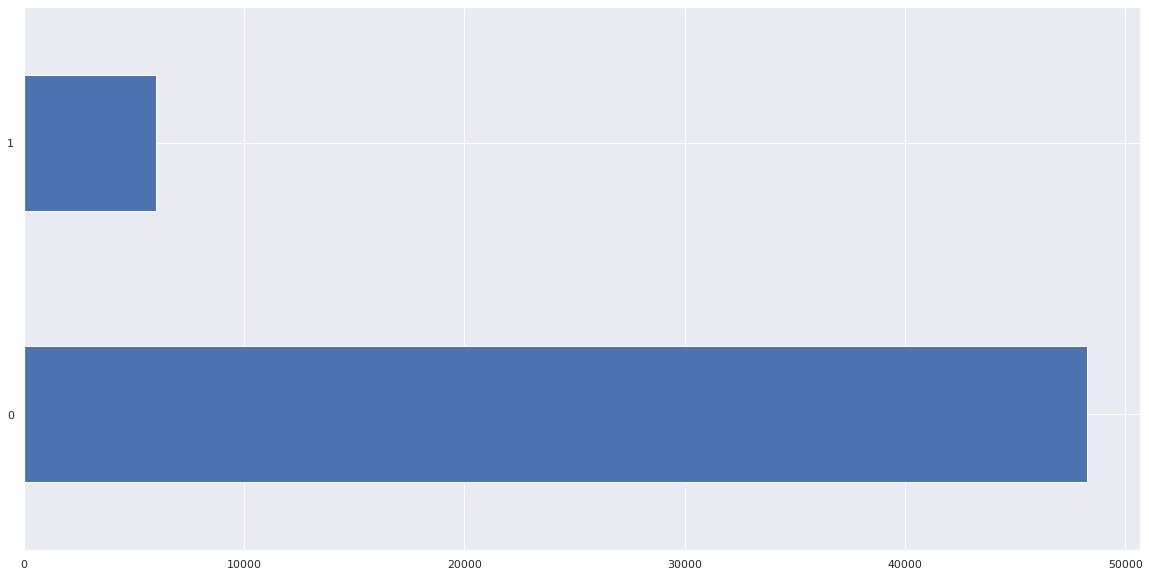

In [48]:
pd.Series(y_normal_shots).value_counts().head(5).plot(kind='barh', figsize = (20,10))

In [49]:
#create dataframe for each type of shot
'''
features = ['angle', 'comment', 'distance', 'elapsed', 'id', 'match_id', 'new_subtype', 'outcome', 'player1',
            'player2', 'pos_x', 'pos_y', 'subtype', 'team', 'type', 'target']
'''
features = ['type', 'subtype', 'team', 'pos_x', 'pos_y', 'elapsed', 'match_id',
       'id', 'player1', 'distance', 'angle', 'outcome', 'new_subtype',
       'player2', 'comment', 'target']

data = normal_shots #to modify according the shot type of your choice
df_normal_shots = pd.DataFrame(data = data, index = range(data.shape[0]),columns = features)

#data = backheel #to modify according the shot type of your choice
df_backheel = pd.DataFrame(data = data, index = range(data.shape[0]),columns = features)

data = bicycle_kicks #to modify according the shot type of your choice
df_bicycle_kicks = pd.DataFrame(data = data, index = range(data.shape[0]),columns = features)

data = direct_free_kicks #to modify according the shot type of your choice
df_direct_free_kicks = pd.DataFrame(data = data, index = range(data.shape[0]),columns = features)

data = header #to modify according the shot type of your choice
df_header = pd.DataFrame(data = data, index = range(data.shape[0]),columns = features)

data = indirect_free_kicks #to modify according the shot type of your choice
df_indirect_free_kicks = pd.DataFrame(data = data, index = range(data.shape[0]),columns = features)

data = volley #to modify according the shot type of your choice
df_volley = pd.DataFrame(data = data, index = range(data.shape[0]),columns = features)


In [50]:
df_volley

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle,outcome,new_subtype,player2,comment,target
0,NaN,volley,10233.0,35.0,13.0,22,12534,3902323,39284.0,36.400549,0.2783,1,volley,NaN,n,1
1,shotoff,volley,8636.0,14.0,7.0,45,13105,5394260,39295.0,21.260292,0.851966,0,volley,NaN,NaN,0
2,shotoff,volley,8535.0,26.0,9.0,63,13216,4806824,37631.0,29.529646,0.493941,0,volley,NaN,NaN,0
3,shotoff,big chance volley,9788.0,30.0,7.0,26,9872,4453085,269788.0,34.0,0.489957,0,volley,NaN,NaN,0
4,shoton,volley,9885.0,28.0,6.0,7,13186,5560343,248453.0,32.756679,0.545655,0,volley,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,shotoff,volley,8588.0,26.0,6.0,35,7322,4403150,208672.0,31.064449,0.579074,0,volley,NaN,NaN,0
2736,shoton,volley,9748.0,13.0,6.0,31,7069,3880659,469852.0,21.400935,0.91795,0,volley,NaN,NaN,0
2737,NaN,volley,9851.0,26.0,8.0,27,7217,4133485,39139.0,30.016662,0.523278,1,volley,210390.0,n,1
2738,shotoff,volley,9826.0,13.0,7.0,45,4720,4758768,46417.0,20.615528,0.88848,0,volley,NaN,NaN,0


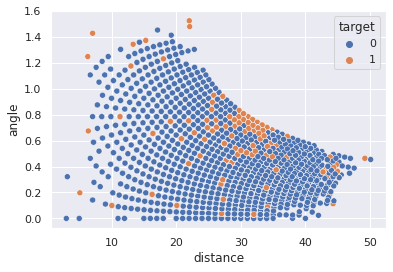

In [51]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="distance", y="angle",
                     hue="target",
                      sizes=(30, 200),
                     data=df_normal_shots, legend = 'full')

Accuracy of each model is going to be very high because classes (goal or not) are unbalanced

Bayesian Classifier is the best one according to the scientific paper

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold, KFold

Select data to train models. It is a case of unbalanced classes, so a train dataset with balanced classes

In [53]:
def create_training_dataset(data) :
    
    '''
    data :  data with unbalanced classes
    '''
    '''
    if (data.target == 1).sum() > 0 and (data.target == 0).sum() > 0 :
        class_1 = (data.target == 1).sum() #Qty of goals
    
        data_no_goal = data[data.target == 0] #only shots involving no goal
    
   
        data_no_goal = data_no_goal.sample(n=class_1, replace=True, random_state = 1) #no goal shots dataframe with the same qty than
                                                                        #class_1 for balanced classes
    
        data_for_training = pd.concat([data_no_goal, data[data.target == 1]])        
    
        
    '''
    
    data_for_training = data
    return data_for_training.sample(frac = 1)

In [54]:
training_normal_shots = create_training_dataset(df_normal_shots)

#training_backheel = create_training_dataset(df_backheel)

training_bicycle_kicks = create_training_dataset(df_bicycle_kicks)

training_direct_free_kicks = create_training_dataset(df_direct_free_kicks)

training_header = create_training_dataset(df_header)

training_indirect_free_kicks = create_training_dataset(df_indirect_free_kicks)

training_volley = create_training_dataset(df_volley)

Kfold validation to train the model correctly for normal_shots

In [55]:
kf = KFold(n_splits = 10)

In [56]:
clf_normal_shots = RandomForestClassifier()

#cross val à 10 folds
scores = cross_val_score(estimator = clf_normal_shots, X = training_normal_shots[['distance','angle']],y = training_normal_shots['target'].astype(int),
                         scoring = 'accuracy', cv = kf)


#learning curve to control overfitting
train_sizes = [5, 30, 100, 2000, 5000, 7000, 10000, 14000]
train_sizes, train_scores, test_scores = learning_curve(estimator = clf_normal_shots, X = training_normal_shots[['distance','angle']],
                y = training_normal_shots['target'].astype(int),
               scoring = 'accuracy', cv = kf, train_sizes = train_sizes,
               random_state = 1)

In [57]:
training_normal_shots

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle,outcome,new_subtype,player2,comment,target
28391,shotoff,crossbar,9817.0,20.0,5.0,11,4607,5363192,417068.0,26.907248,0.732815,0,normal_shots,NaN,NaN,0
17743,shoton,shot,9831.0,17.0,13.0,34,7535,5116251,26163.0,19.723083,0.531724,0,normal_shots,NaN,NaN,0
38743,shoton,blocked_shot,7819.0,19.0,15.0,31,7730,5582334,94307.0,20.615528,0.398522,0,normal_shots,NaN,NaN,0
41936,shoton,blocked_shot,7943.0,28.0,16.0,88,12938,5047559,41542.0,28.861739,0.244979,0,normal_shots,NaN,NaN,0
28696,shotoff,distance,8466.0,23.0,17.0,18,4165,4119148,502420.0,23.769729,0.255182,0,normal_shots,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45308,shotoff,crossbar,8592.0,20.0,3.0,19,7654,4708215,248689.0,28.284271,0.785398,0,normal_shots,NaN,NaN,0
1177,shoton,blocked_shot,8689.0,29.0,16.0,11,7129,3992219,154280.0,29.832868,0.236849,0,normal_shots,NaN,NaN,0
46573,shoton,shot,10003.0,26.0,6.0,67,4275,4364526,156556.0,31.064449,0.579074,0,normal_shots,NaN,NaN,0
23409,shoton,distance,8697.0,28.0,16.0,66,9694,3997805,164259.0,28.861739,0.244979,0,normal_shots,NaN,NaN,0


In [58]:
mean_training_score = train_scores.mean(axis = 1)
mean_test_score = test_scores.mean(axis = 1)

In [59]:
print('control standard error to know if all the dataset behave in the same way\n')
print('Test_score on each fold\n')
for i in range(scores.shape[0]) :
    print('Test_score fold n°{} : {}'.format(i+1, scores[i]))

control standard error to know if all the dataset behave in the same way

Test_score on each fold

Test_score fold n°1 : 0.9109841503870254
Test_score fold n°2 : 0.9061924069295982
Test_score fold n°3 : 0.9039808330261703
Test_score fold n°4 : 0.9050866199778843
Test_score fold n°5 : 0.9032436417250277
Test_score fold n°6 : 0.9178031699225949
Test_score fold n°7 : 0.9080353851824549
Test_score fold n°8 : 0.9094930875576037
Test_score fold n°9 : 0.9096774193548387
Test_score fold n°10 : 0.9050691244239631


In [60]:
print('\n', '-' * 20) # separator
print('Mean training score\n\n', pd.Series(mean_training_score, index = train_sizes) )

print('\n', '-' * 20) #separator
print('Mean test score\n\n', pd.Series(mean_test_score, index = train_sizes))


 --------------------
Mean training score

 5        1.000000
30       0.996667
100      0.988000
2000     0.920900
5000     0.914380
7000     0.910614
10000    0.910220
14000    0.910107
dtype: float64

 --------------------
Mean test score

 5        0.889231
30       0.884273
100      0.879647
2000     0.897009
5000     0.904086
7000     0.905450
10000    0.906777
14000    0.907441
dtype: float64


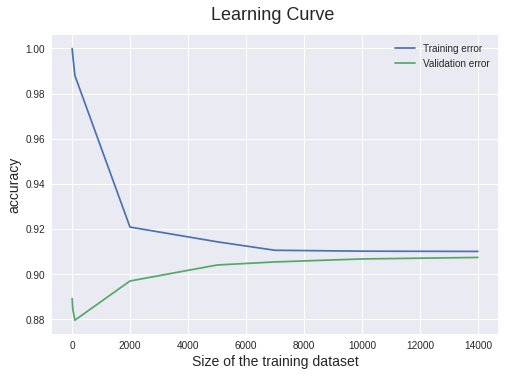

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.plot(train_sizes, mean_training_score, label = 'Training error')
plt.plot(train_sizes, mean_test_score, label = 'Validation error')

plt.ylabel('accuracy', fontsize=14)
plt.xlabel('Size of the training dataset', fontsize=14)
plt.title("Learning Curve ", fontsize=18, y=1.03)
plt.legend()

Create one model for each shot type

In [62]:
#one model for each type of shot
model_normal_shots = LogisticRegression()
model_direct_free_kicks = LogisticRegression()
model_bicycle_kicks = LogisticRegression()
model_header = LogisticRegression()
model_indirect_free_kicks = LogisticRegression()
model_volley = LogisticRegression()
models = [model_normal_shots, model_direct_free_kicks, model_bicycle_kicks, model_header, model_indirect_free_kicks,
         model_volley]

dic_dataframe = {}
dic_dataframe['normal_shots'] = training_normal_shots
dic_dataframe['direct_free_kicks'] = training_direct_free_kicks
dic_dataframe['bicycle_kicks'] = training_bicycle_kicks
dic_dataframe['header'] = training_header
dic_dataframe['indirect_free_kicks'] = training_indirect_free_kicks
dic_dataframe['volley'] = training_volley

Pour chaque type de tir, il faut prédire la probabailité qu'il soit converti en but (Xg)

In [63]:
model = GaussianNB()
model.fit(training_normal_shots[['distance', 'angle']], training_normal_shots['target'].astype(int))
training_normal_shots['Xg'] = model.predict_proba(training_normal_shots[['distance', 'angle']])[:, 1]

model =  GaussianNB()
model.fit(training_direct_free_kicks[['distance', 'angle']], training_direct_free_kicks['target'].astype(int))
training_direct_free_kicks['Xg'] = model.predict_proba(training_direct_free_kicks[['distance', 'angle']])[:, 1]

model =  GaussianNB()
model.fit(training_bicycle_kicks[['distance', 'angle']], training_bicycle_kicks['target'].astype(int))
training_bicycle_kicks['Xg'] = model.predict_proba(training_bicycle_kicks[['distance', 'angle']])[:, 1]

model =  GaussianNB()
model.fit(training_header[['distance', 'angle']], training_header['target'].astype(int))
training_header['Xg'] = model.predict_proba(training_header[['distance', 'angle']])[:, 1]

model =  GaussianNB()
model.fit(training_indirect_free_kicks[['distance', 'angle']], training_indirect_free_kicks['target'].astype(int))
training_indirect_free_kicks['Xg'] = model.predict_proba(training_indirect_free_kicks[['distance', 'angle']])[:, 1]

model =  GaussianNB()
model.fit(training_volley[['distance', 'angle']], training_volley['target'].astype(int))
training_volley['Xg'] = model.predict_proba(training_volley[['distance', 'angle']])[:, 1]

In [64]:
training_normal_shots

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle,outcome,new_subtype,player2,comment,target,Xg
28391,shotoff,crossbar,9817.0,20.0,5.0,11,4607,5363192,417068.0,26.907248,0.732815,0,normal_shots,NaN,NaN,0,0.245493
17743,shoton,shot,9831.0,17.0,13.0,34,7535,5116251,26163.0,19.723083,0.531724,0,normal_shots,NaN,NaN,0,0.068241
38743,shoton,blocked_shot,7819.0,19.0,15.0,31,7730,5582334,94307.0,20.615528,0.398522,0,normal_shots,NaN,NaN,0,0.041537
41936,shoton,blocked_shot,7943.0,28.0,16.0,88,12938,5047559,41542.0,28.861739,0.244979,0,normal_shots,NaN,NaN,0,0.029757
28696,shotoff,distance,8466.0,23.0,17.0,18,4165,4119148,502420.0,23.769729,0.255182,0,normal_shots,NaN,NaN,0,0.021970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45308,shotoff,crossbar,8592.0,20.0,3.0,19,7654,4708215,248689.0,28.284271,0.785398,0,normal_shots,NaN,NaN,0,0.246154
1177,shoton,blocked_shot,8689.0,29.0,16.0,11,7129,3992219,154280.0,29.832868,0.236849,0,normal_shots,NaN,NaN,0,0.027438
46573,shoton,shot,10003.0,26.0,6.0,67,4275,4364526,156556.0,31.064449,0.579074,0,normal_shots,NaN,NaN,0,0.223314
23409,shoton,distance,8697.0,28.0,16.0,66,9694,3997805,164259.0,28.861739,0.244979,0,normal_shots,NaN,NaN,0,0.029757


Adjust Xg depending on somme parameters :
    1. Weight on shot xG if the team has a player advantage: 0.90
    2. Weight on shot xG if the team has a player disadvantage: 1.25
    3. Weight k on shot xG at end of game if winning by 1 goal: 0.52
    4. Weight k on shot xG at end of game if winning by 2 goals or more: 0.90

Create new_Xg depending on score at 70'

In [65]:
#on créé une nouvelle colonne coef_avantage
def create_column(df, name_col) :
    df[name_col] = 0 #initialisation
    
    return df

In [66]:
def score(df_goals, minute, team_id) :
    
    """
    df : goals for one match
    minute : minute from  wich calcul of the score is done
    team_id : id of the team for which the calcul is done
    
    
    return Calcule l'avantage d'une équipe à un temps donné du match
    """
    
    goals_for = df_goals[df_goals.team == team_id][df_goals.elapsed <= minute].shape[0]
    goals_against = df_goals[df_goals.elapsed <= minute].shape[0] - goals_for
    
    return goals_for - goals_against

In [67]:
def xg_coef(data, df_goals, coef_end_game_1 = 0.52, coef_end_game_2 = 0.90, time_start_coef = 70) :
    
    """
    data : ligne d'un dataframe (une seule donnée)
    
    
    return : coef multiplicateur
    """
    
    if data.elapsed <= 70 :
        coef = 1
    else :
        id_match = data.match_id
        df_goals = df_goals[df_goals.match_id == id_match]
        minute = data.elapsed
        team_id = data.team
        
        
        diff = score(df_goals, minute, team_id)
        
        
        if diff == 1: 
            step = (1 - coef_end_game_1) / (90 - time_start_coef)
            coef = 1 -  (minute - time_start_coef) *step
            
        elif diff >= 2 :
            step = (1 - coef_end_game_2) / (90 - time_start_coef)
            coef = 1 -  (minute - time_start_coef) *step
            
        else :
            coef = 1
                        
    
    return coef      

In [68]:
for df_shots in [training_normal_shots, training_volley, training_indirect_free_kicks, training_direct_free_kicks,
                training_header, training_bicycle_kicks] :
    
    df_shots = create_column(df_shots, 'coef_1_2')
    for i in df_shots.index :
        data = df_shots.loc[i, :]
        coef_xg = xg_coef(data, goals, coef_end_game_1 = 0.52, coef_end_game_2 = 0.90, time_start_coef = 70 )
        df_shots.loc[i, 'coef_1_2'] = coef_xg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [69]:
#create new Xg
for df_shots in [training_normal_shots, training_volley, training_indirect_free_kicks, training_direct_free_kicks,
                training_header, training_bicycle_kicks] :
    
    df_shots = create_column(df_shots, 'new_xg_1_2')
    df_shots['new_xg_1_2'] = df_shots['Xg'] * df_shots['coef_1_2']

Create new Xg depending on player (dis)advantage

In [70]:
def advantage(cards, minute, team_id) :
    
    """
    df : goals for one match
    minute : minute from  wich calcul of the score is done
    team_id : id of the team for which the calcul is done
    
    
    return Calcule l'avantage d'une équipe à un temps donné du match
    """
    
    cards_for_red = cards[cards.team == team_id][cards.elapsed <= minute][cards.card_type == 'r'].shape[0]
    cards_for_y2 = cards[cards.team == team_id][cards.elapsed <= minute][cards.card_type == 'y2'].shape[0]  
    cards_for = cards_for_red + cards_for_y2                                                                    
                                                                         
                                                                         
    cards_against_red = cards[cards.elapsed <= minute][cards.card_type == 'r'].shape[0] - cards_for_red
    cards_against_y2 = cards[cards.elapsed <= minute][cards.card_type == 'r'].shape[0] - cards_for_y2
    cards_against = cards_against_red + cards_against_y2
    
    return cards_against - cards_for

In [71]:
def xg_player_advantage(data, cards, coef_advantage = 0.90, coef_disadvantage = 1.25) :
    
    id_match = data.match_id
    cards = cards[cards.match_id == id_match]
    minute = data.elapsed
    team_id = data.team
    
    if advantage(cards, minute, team_id) > 0 :
        coef = coef_advantage
    
    elif advantage(cards, minute, team_id) < 0 :
        coef = coef_disadvantage
        
    else :
        coef = 1
        
    return coef
    

In [72]:
for df_shots in [training_normal_shots, training_volley, training_indirect_free_kicks, training_direct_free_kicks,
                training_header, training_bicycle_kicks] :
    
    print(df_shots)
    
    df_shots = create_column(df_shots, 'coef_dis_advantage')
    
    j=0
    for i in df_shots.index :
        
        if j%1000 == 0:
            print(j)
        
        data = df_shots.loc[i, :]
        coef_advantage = xg_player_advantage(data, cards, coef_advantage = 0.90, coef_disadvantage = 1.25)
        df_shots.loc[i, 'coef_dis_advantage'] = coef_advantage
        j+=1

          type       subtype     team pos_x pos_y elapsed match_id       id  \
28391  shotoff      crossbar   9817.0  20.0   5.0      11     4607  5363192   
17743   shoton          shot   9831.0  17.0  13.0      34     7535  5116251   
38743   shoton  blocked_shot   7819.0  19.0  15.0      31     7730  5582334   
41936   shoton  blocked_shot   7943.0  28.0  16.0      88    12938  5047559   
28696  shotoff      distance   8466.0  23.0  17.0      18     4165  4119148   
...        ...           ...      ...   ...   ...     ...      ...      ...   
45308  shotoff      crossbar   8592.0  20.0   3.0      19     7654  4708215   
1177    shoton  blocked_shot   8689.0  29.0  16.0      11     7129  3992219   
46573   shoton          shot  10003.0  26.0   6.0      67     4275  4364526   
23409   shoton      distance   8697.0  28.0  16.0      66     9694  3997805   
22739   shoton  blocked_shot   9880.0  13.0   8.0      86    12636  4098059   

        player1   distance     angle outcome   new_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
         type            subtype     team pos_x pos_y elapsed match_id  \
2531   shoton  big chance volley  10003.0  13.0  19.0      34     4557   
1401      NaN             volley   8722.0  27.0   6.0      83     9859   
2104  shotoff             volley   8636.0  24.0   6.0      70    13150   
2058  shotoff             volley   9823.0  20.0   6.0      53    10203   
1500  shotoff             volley   9891.0  22.0   5.0      54    13004   
...       ...                ...      ...   ...   ...     ...      ...   
2479  shotoff             volley   9941.0  16.0   4.0      30     7386   
1506  shotoff             volley   7819.0  33.0   9.0      13     7511   
1655  shotoff      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1000
2000
       type            subtype     team pos_x pos_y elapsed match_id       id  \
66   shoton  indirect freekick   8406.0  39.0  19.0      49     9811  4281285   
24   shoton  indirect freekick   8534.0  26.0  16.0      11    12822  4509183   
20  shotoff  indirect freekick  10003.0  29.0  21.0      90     4377  3853651   
23   shoton  indirect freekick   8654.0  40.0   5.0      43     4182  4153222   
37  shotoff  indirect freekick   8543.0  22.0  22.0      25    12651  4117217   
..      ...                ...      ...   ...   ...     ...      ...      ...   
19  shotoff  indirect freekick   8600.0  20.0  17.0      45    12883  3876352   
80  shotoff  indirect freekick   9885.0  30.0  15.0      83    12912  4965317   
1    shoton  indirect freekick   8529.0  19.0  17.0      90    12679  4199732   
15  shotoff  indirect freekick   8472.0  25.0  21.0      45     4562  5255304   
87   shoton  indirect freekick   7943.0  36.0  25.0      13    12923  4981209   

     player1   di

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


         type          subtype     team pos_x pos_y elapsed match_id       id  \
591   shotoff  direct_freekick   8177.0  21.0  18.0      63    10147  5469767   
345   shotoff  direct_freekick   8678.0  11.0  13.0      73     4730  4793769   
621   shotoff  direct_freekick   9790.0  33.0  16.0      26     9752  3675862   
1056   shoton  direct_freekick   9804.0  18.0  13.0      58    12665  4167374   
396    shoton  direct_freekick  10167.0  23.0  17.0      58    12695  4238933   
...       ...              ...      ...   ...   ...     ...      ...      ...   
892   shotoff  direct_freekick   8639.0  28.0  17.0      43     7732  5582600   
2053  shotoff  direct_freekick   9847.0   8.0  14.0      81     7645  5363143   
2285  shotoff  direct_freekick  10249.0  25.0  18.0      28     7593  5242614   
2054  shotoff  direct_freekick   8178.0  19.0  14.0      55    10205  4758554   
193    shoton  direct_freekick   7819.0  31.0  21.0      57     7615  5291128   

       player1   distance  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1000
2000
          type            subtype     team pos_x pos_y elapsed match_id  \
4769   shotoff             header  10252.0  25.0   8.0      38     4499   
1158   shotoff             header   9829.0  23.0   6.0      16     7736   
1400    shoton  big chance header   8178.0  33.0   9.0      73     9919   
10413      NaN             header   9830.0  20.0   9.0      11     7795   
6383   shotoff             header   8586.0  21.0   7.0      45     4104   
...        ...                ...      ...   ...   ...     ...      ...   
6556   shotoff             header   8721.0  27.0   8.0      30     9659   
7413    shoton     blocked_header   9831.0  18.0   5.0      33     7642   
2929    shoton             header   9829.0  20.0   7.0      16     7125   
3859   shotoff             header   9804.0  22.0   7.0      41    12594   
4636   shotoff             header   8686.0  23.0   5.0      90    13017   

            id   player1   distance     angle outcome new_subtype   player2  \
4769   467

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
        type       subtype     team pos_x pos_y elapsed match_id       id  \
309  shotoff  bicycle_kick   9790.0  22.0  11.0      90     9921  3791332   
173  shotoff  bicycle_kick   8668.0  17.0   7.0      48     4199  4218423   
284  shotoff  bicycle_kick   8524.0  27.0  10.0      27    13024  5208782   
279   shoton  bicycle_kick   9823.0  24.0   6.0      17     9654  3897659   
136   shoton  bicycle_kick  10252.0  21.0   6.0      43     4635  5420670   
..       ...           ...      ...   ...   ...     ...      ...      ...   
254   shoton  bicycle_kick   8524.0  12.0   7.0      13    13124  5425080   
79   shotoff  bicycle_kick   8668.0  18.0   7.0      90     4323  4513498   
154  shotoff  bicycle_kick   9837.0  22.0  25.0      35     7529  5121485   
114   shoton  bicycle_kick   8588.0  22.0   6.0      89     7390  3756544   
151      NaN  bicycle_kick  10003.0  22.0   7.0      37     4257  4310865   

      player1   distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [73]:
df_shots

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,angle,outcome,new_subtype,player2,comment,target,Xg,coef_1_2,new_xg_1_2,coef_dis_advantage
309,shotoff,bicycle_kick,9790.0,22.0,11.0,90,9921,3791332,79982.0,25.059928,0.499347,0,bicycle_kicks,NaN,NaN,0,0.095942,1.0,0.095942,1.0
173,shotoff,bicycle_kick,8668.0,17.0,7.0,48,4199,4218423,23782.0,23.345235,0.755104,0,bicycle_kicks,NaN,NaN,0,0.172227,1.0,0.172227,1.0
284,shotoff,bicycle_kick,8524.0,27.0,10.0,27,13024,5208782,210932.0,29.966648,0.448723,0,bicycle_kicks,NaN,NaN,0,0.058074,1.0,0.058074,1.0
279,shoton,bicycle_kick,9823.0,24.0,6.0,17,9654,3897659,116772.0,29.410882,0.616297,0,bicycle_kicks,NaN,NaN,0,0.189116,1.0,0.189116,1.0
136,shoton,bicycle_kick,10252.0,21.0,6.0,43,4635,5420670,107415.0,27.018512,0.680521,0,bicycle_kicks,NaN,NaN,0,0.224214,1.0,0.224214,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,shoton,bicycle_kick,8524.0,12.0,7.0,13,13124,5425080,45220.0,20.0,0.927295,0,bicycle_kicks,NaN,NaN,0,0.034978,1.0,0.034978,1.0
79,shotoff,bicycle_kick,8668.0,18.0,7.0,90,4323,4513498,32705.0,24.083189,0.726642,0,bicycle_kicks,NaN,NaN,0,0.193554,1.0,0.193554,1.0
154,shotoff,bicycle_kick,9837.0,22.0,25.0,35,7529,5121485,89476.0,22.090722,0.09066,0,bicycle_kicks,NaN,NaN,0,0.000036,1.0,0.000036,1.0
114,shoton,bicycle_kick,8588.0,22.0,6.0,89,7390,3756544,27573.0,27.802878,0.657889,0,bicycle_kicks,NaN,NaN,0,0.218728,1.0,0.218728,1.0


In [74]:
#create new Xg
for df_shots in [training_normal_shots, training_volley, training_indirect_free_kicks, training_direct_free_kicks,
                training_header, training_bicycle_kicks] :
    
    df_shots = create_column(df_shots, 'new_xg_advantage')
    df_shots['new_xg_advantage'] = df_shots['new_xg_1_2'] * df_shots['coef_dis_advantage']

In [75]:
#expected goals for all shots
training_all_shots = pd.concat([training_normal_shots, training_volley, training_indirect_free_kicks, training_direct_free_kicks,
                training_header, training_bicycle_kicks])

In [76]:
training_all_shots

,type,subtype,team,pos_x,pos_y,elapsed,match_id,id,player1,distance,...,outcome,new_subtype,player2,comment,target,Xg,coef_1_2,new_xg_1_2,coef_dis_advantage,new_xg_advantage
28391,shotoff,crossbar,9817.0,20.0,5.0,11,4607,5363192,417068.0,26.907248,...,0,normal_shots,NaN,NaN,0,0.245493,1.0,0.245493,1.0,0.245493
17743,shoton,shot,9831.0,17.0,13.0,34,7535,5116251,26163.0,19.723083,...,0,normal_shots,NaN,NaN,0,0.068241,1.0,0.068241,1.0,0.068241
38743,shoton,blocked_shot,7819.0,19.0,15.0,31,7730,5582334,94307.0,20.615528,...,0,normal_shots,NaN,NaN,0,0.041537,1.0,0.041537,1.0,0.041537
41936,shoton,blocked_shot,7943.0,28.0,16.0,88,12938,5047559,41542.0,28.861739,...,0,normal_shots,NaN,NaN,0,0.029757,1.0,0.029757,0.9,0.026781
28696,shotoff,distance,8466.0,23.0,17.0,18,4165,4119148,502420.0,23.769729,...,0,normal_shots,NaN,NaN,0,0.021970,1.0,0.021970,1.0,0.021970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,shoton,bicycle_kick,8524.0,12.0,7.0,13,13124,5425080,45220.0,20.0,...,0,bicycle_kicks,NaN,NaN,0,0.034978,1.0,0.034978,1.0,0.034978
79,shotoff,bicycle_kick,8668.0,18.0,7.0,90,4323,4513498,32705.0,24.083189,...,0,bicycle_kicks,NaN,NaN,0,0.193554,1.0,0.193554,1.0,0.193554
154,shotoff,bicycle_kick,9837.0,22.0,25.0,35,7529,5121485,89476.0,22.090722,...,0,bicycle_kicks,NaN,NaN,0,0.000036,1.0,0.000036,1.0,0.000036
114,shoton,bicycle_kick,8588.0,22.0,6.0,89,7390,3756544,27573.0,27.802878,...,0,bicycle_kicks,NaN,NaN,0,0.218728,1.0,0.218728,1.0,0.218728


# Modelisation Xg Match (for team)

1. Xg match is the sum of Xg shot

In [77]:
#create dataframe for Xg match
df_xg_match = pd.DataFrame(index = new_match_data.index, columns = ['match_id', 'season', 'league', 'team_1', 'team_2', 'Xg_team_1', 'Xg_team_2'])

In [78]:
df_xg_match[['match_id', 'season', 'league', 'day', 'team_1', 'team_2']] = new_match_data[['id','season', 'league_id', 'stage' ,'home_team_api_id', 'away_team_api_id']]

In [79]:
#calcul Xg match
#ATTENTION !!! : certains matchs n'ont pas de stats de tirs donc pas de Xg...
j=0 #for cpt
for i in df_xg_match.index :
    id_match = df_xg_match.loc[i, 'match_id']
    id_team_1 = df_xg_match.loc[i, 'team_1']
    id_team_2 = df_xg_match.loc[i, 'team_2']
    
    #print(id_match)
        
    training_all_shots_match = training_all_shots[training_all_shots.match_id == id_match]
    match_xg_team_1 = training_all_shots_match[training_all_shots_match.team == id_team_1].new_xg_advantage.sum()
    match_xg_team_2 = training_all_shots_match[training_all_shots_match.team == id_team_2].new_xg_advantage.sum()
    
    
    #print(match_xg_team_1)
    
    df_xg_match.loc[i, 'Xg_team_1'] = match_xg_team_1
    df_xg_match.loc[i, 'Xg_team_2'] = match_xg_team_2
    
    if j%1000 == 0 :
        print(j/len(list(df_xg_match.index))*100)
        
    j+=1

0.0
34.59010722933241
69.18021445866482


2. Xg match with other statistics. Lack of data to complete this part. Our model would have been better with it

summary df_xg_match

In [80]:
df_xg_match.head()

,match_id,season,league,team_1,team_2,Xg_team_1,Xg_team_2,day
4008,4009,2014/2015,1729,9825,9826,1.157495,0.208508,1
4009,4010,2014/2015,1729,8191,8455,0.506293,1.23842,1
4010,4011,2014/2015,1729,8197,8668,1.18213,1.586294,1
4011,4012,2014/2015,1729,8650,8466,0.841446,1.175351,1
4012,4013,2014/2015,1729,10260,10003,1.352472,0.481599,1


# ELO calculation

In [81]:
def elo_t2(elo_t1, actual_Xg, expected_Xg, learning_rate = 0.12) :
    
    """
    UPdate an Elo score after each math
    
    elo_t1 : score elo before the matchh, ie, of the previous stage
    actual_Xg : expected goals post match
    
    expected_Xg : 
    The expected number of expected goals value is a weighted average of: 
    ⇤ a team’s general offensive rating
    ⇤ this team’s home/away-speciﬁc offensive rating 
    ⇤ the opposing team’s general defensive rating 
    ⇤ the opposing team’s home/away-speciﬁc defensive rating
    
    Return : Score Elo actualisé
    
    """
    
    updated_elo = elo_t1 + learning_rate*(actual_Xg - expected_Xg)
    
    return updated_elo

In [82]:
def expected_Xg(gen_off_rating, home_off_rating, away_off_rating, gen_def_opp_rating,
                home_def_opp_rating, away_def_opp_rating, home , away, weight = 0.20 ) :
    
    
    """
    Return Expected goals value
    
    homme / away : booleans if match is home or away for the actual team
    
    """
    
    if home == True and away == False :
        expected_Xg = (1- weight)*(gen_off_rating+gen_def_opp_rating) + weight*(home_off_rating+away_def_opp_rating)/2
    
    if home == False and away == True :
        expected_Xg = (1- weight)*(gen_off_rating+gen_def_opp_rating) + weight*(away_off_rating+home_def_opp_rating)/2
    
    
    return expected_Xg

In [83]:
def set_elo_rating(match_data) :
    
    teams = list(set(match_data[match_data.season == '2013/2014'].home_team_api_id))
    
    elo_13_14 = pd.DataFrame(index = range(len(teams)), columns = ['teams', 'goals_for', 'goals_against',
                                                                  'goals_for_home', 'goals_for_away',
                                                                  'goals_against_home', 'goals_against_away'])
    elo_13_14['teams'] = teams
    
    for i in elo_13_14.index :
        print(round(i/len(teams)*100,2))
        team_id = elo_13_14.loc[i, 'teams']
        goals_for_home = match_data[match_data.season == '2013/2014'][match_data.home_team_api_id == team_id].home_team_goal.sum() / match_data[match_data.season == '2013/2014'][match_data.home_team_api_id == team_id].home_team_goal.shape[0]
            
        goals_against_home = match_data[match_data.season == '2013/2014'][match_data.home_team_api_id == team_id].away_team_goal.sum()/ match_data[match_data.season == '2013/2014'][match_data.home_team_api_id == team_id].away_team_goal.shape[0]
        
        goals_for_away = match_data[match_data.season == '2013/2014'][match_data.away_team_api_id == team_id].away_team_goal.sum() / match_data[match_data.season == '2013/2014'][match_data.away_team_api_id == team_id].away_team_goal.shape[0]
            
        goals_against_away = match_data[match_data.season == '2013/2014'][match_data.away_team_api_id == team_id].home_team_goal.sum() / match_data[match_data.season == '2013/2014'][match_data.away_team_api_id == team_id].home_team_goal.shape[0]
    
        goals_for = (goals_for_home + goals_for_away)/2
        goals_against = (goals_against_home + goals_against_away)/2
        
        elo_13_14.loc[i, ['goals_for', 'goals_against', 'goals_for_home', 'goals_for_away',
                        'goals_against_home', 'goals_against_away']] = [goals_for, goals_against, goals_for_home,
                                                                        goals_for_away, goals_against_home,
                                                                        goals_against_away]
        
    return elo_13_14

In [84]:
set_elo = set_elo_rating(match_data)

0.0
0.57
1.15
1.72
2.3
2.87


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


3.45
4.02
4.6
5.17
5.75
6.32
6.9
7.47
8.05
8.62
9.2
9.77
10.34
10.92
11.49
12.07
12.64
13.22
13.79
14.37
14.94
15.52
16.09
16.67
17.24
17.82
18.39
18.97
19.54
20.11
20.69
21.26
21.84
22.41
22.99
23.56
24.14
24.71
25.29
25.86
26.44
27.01
27.59
28.16
28.74
29.31
29.89
30.46
31.03
31.61
32.18
32.76
33.33
33.91
34.48
35.06
35.63
36.21
36.78
37.36
37.93
38.51
39.08
39.66
40.23
40.8
41.38
41.95
42.53
43.1
43.68
44.25
44.83
45.4
45.98
46.55
47.13
47.7
48.28
48.85
49.43
50.0
50.57
51.15
51.72
52.3
52.87
53.45
54.02
54.6
55.17
55.75
56.32
56.9
57.47
58.05
58.62
59.2
59.77
60.34
60.92
61.49
62.07
62.64
63.22
63.79
64.37
64.94
65.52
66.09
66.67
67.24
67.82
68.39
68.97
69.54
70.11
70.69
71.26
71.84
72.41
72.99
73.56
74.14
74.71
75.29
75.86
76.44
77.01
77.59
78.16
78.74
79.31
79.89
80.46
81.03
81.61
82.18
82.76
83.33
83.91
84.48
85.06
85.63
86.21
86.78
87.36
87.93
88.51
89.08
89.66
90.23
90.8
91.38
91.95
92.53
93.1
93.68
94.25
94.83
95.4
95.98
96.55
97.13
97.7
98.28
98.85
99.43


In [85]:
set_elo

,teams,goals_for,goals_against,goals_for_home,goals_for_away,goals_against_home,goals_against_away
0,10243,1.416667,1.444444,1.555556,1.277778,1.333333,1.555556
1,10249,1.184211,1.394737,1.157895,1.210526,1.0,1.789474
2,10251,0.805556,1.336111,1.0,0.611111,1.45,1.222222
3,10252,1.026316,1.605263,1.157895,0.894737,1.526316,1.684211
4,8721,1.852941,1.470588,2.176471,1.529412,1.294118,1.647059
...,...,...,...,...,...,...,...
169,2033,0.7,1.633333,0.866667,0.533333,1.133333,2.133333
170,4087,1.026316,1.342105,1.315789,0.736842,1.263158,1.421053
171,10233,1.078947,1.315789,1.157895,1.0,1.0,1.631579
172,10235,2.235294,1.176471,2.588235,1.882353,1.0,1.352941


In [86]:
def create_ranking(match_data, id_league, season = '2013/2014') :
    
    """
    
    Return the ranking for specified leagues and seasons
    """
    
    league_match = match_data[match_data.league_id == id_league][match_data.season == season]
    teams = list(set(list(league_match.home_team_api_id))) #all teams id 
                                                                                                #of the league
    
    ranking = pd.DataFrame(index = range(len(teams)), columns = ['team_id', 'pts'])
    ranking['team_id'] = teams
    
    for i in ranking.index :
        id_team = ranking.loc[i, 'team_id']
        
        pts = 0 #points initialisation
        
        home_match = league_match[league_match.home_team_api_id == id_team]
        for j in home_match.index :
            if home_match.loc[j, 'home_team_goal'] > home_match.loc[j, 'away_team_goal'] :
                pts += 3
            elif home_match.loc[j, 'home_team_goal'] == home_match.loc[j, 'away_team_goal'] :
                pts+= 1
            else :
                pts+=0
        
        away_match = league_match[league_match.away_team_api_id == id_team]
        for j in away_match.index :
            if away_match.loc[j, 'home_team_goal'] > away_match.loc[j, 'away_team_goal'] :
                pts += 0
            elif away_match.loc[j, 'home_team_goal'] == away_match.loc[j, 'away_team_goal'] :
                pts+= 1
            else :
                pts+=3
                
        
        ranking.loc[i, 'pts'] = pts
        
    return ranking

In [87]:
def find_up_down_teams(match_data, league_id, year_1, year_2) :
    
    
    """
    match_data : all matchs
    league_id ; id of the league to analyse
    
    
    Return upgrades and downgrades for each league
    """
    
    teams_y1 = list(set(match_data[match_data.league_id == league_id][match_data.season == year_1].home_team_api_id))
    teams_y2 = list(set(match_data[match_data.league_id == league_id][match_data.season == year_2].home_team_api_id))
    
    up_teams = [] #les nouvelles équipes en 2014/2015 par rapport à 2013/2014 par exemple
    for team in teams_y2 :
        if team not in teams_y1 :
            up_teams.append(team)
            
    down_teams = []
    for team in teams_y1 : #les équipes qui descendent entre 2013:14 et 2014/15
        if team not in teams_y2 :
            down_teams.append(team)
            
    return down_teams, up_teams           

In [88]:
seasons_1 = ['2013/2014', '2014/2015'] #model does not consider previous season. Season 2013/2014 is 
seasons_2 = ['2014/2015', '2015/2016']                                              #used ti initialize
leagues_id = list(league_data.id)

df_up_down = pd.DataFrame(index = range(len(seasons_1)*len(leagues_id)), columns = ['season', 'league', 'new', 'former'])

i = 0
for id_league in leagues_id :
    for year1, year2 in zip(seasons_1, seasons_2) :
        former_teams, new_teams = find_up_down_teams(match_data, id_league, year1, year2)
        df_up_down.loc[i, :] = [year2, id_league, new_teams, former_teams]
        print(i/(len(seasons_1)*len(leagues_id) - 1)*100)
        i+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


0.0
4.761904761904762
9.523809523809524
14.285714285714285
19.047619047619047
23.809523809523807
28.57142857142857
33.33333333333333
38.095238095238095
42.857142857142854
47.61904761904761
52.38095238095239
57.14285714285714
61.904761904761905
66.66666666666666
71.42857142857143
76.19047619047619
80.95238095238095
85.71428571428571
90.47619047619048
95.23809523809523
100.0


In [89]:
df_up_down

,season,league,new,former
0,2014/2015,1,"[9984, 9985, 9986, 9987, 9994, 8203, 10000, 10...",[]
1,2015/2016,1,"[9997, 1773]","[9984, 9989]"
2,2014/2015,1729,"[8197, 10172, 8191]","[9879, 8344, 9850]"
3,2015/2016,1729,"[9817, 8678, 9850]","[10172, 8667, 8191]"
4,2014/2015,4769,"[7819, 8588, 8550]","[8576, 9873, 9874]"
5,2015/2016,4769,"[10242, 8121, 6391]","[8588, 4087, 8550]"
6,2014/2015,7809,"[8460, 8722]","[8165, 9776]"
7,2015/2016,7809,"[8262, 8234]","[8358, 8460]"
8,2014/2015,10257,"[9880, 8534, 8540]","[9857, 8530, 8537]"
9,2015/2016,10257,"[9857, 9891, 208931]","[9880, 10167, 8529]"


Calculer le score ELO de chaque équipe après chaque match
1. team_api, day, ELO scores

In [90]:
#add ELO scores colums to df_xg_match, with initialisation

df_xg_match['elo_offensive_1'] = 0.0
df_xg_match['elo_defensive_1'] = 0.0
df_xg_match['elo_home_offensive_1'] = 0.0
df_xg_match['elo_away_offensive_1'] = 0.0
df_xg_match['elo_home_defensive_1'] = 0.0
df_xg_match['elo_away_defensive_1'] = 0.0

df_xg_match['elo_offensive_2'] = 0.0
df_xg_match['elo_defensive_2'] = 0.0
df_xg_match['elo_home_offensive_2'] = 0.0
df_xg_match['elo_away_offensive_2'] = 0.0
df_xg_match['elo_home_defensive_2'] = 0.0
df_xg_match['elo_away_defensive_2'] = 0.0

In [91]:
df_xg_match.head()

,match_id,season,league,team_1,team_2,Xg_team_1,Xg_team_2,day,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_away_offensive_1,elo_home_defensive_1,elo_away_defensive_1,elo_offensive_2,elo_defensive_2,elo_home_offensive_2,elo_away_offensive_2,elo_home_defensive_2,elo_away_defensive_2
4008,4009,2014/2015,1729,9825,9826,1.157495,0.208508,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4009,4010,2014/2015,1729,8191,8455,0.506293,1.23842,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4010,4011,2014/2015,1729,8197,8668,1.18213,1.586294,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4011,4012,2014/2015,1729,8650,8466,0.841446,1.175351,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4012,4013,2014/2015,1729,10260,10003,1.352472,0.481599,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pour chaque équipe on initialise les scores ELO pour la première journée de championnat de la saison 2014/2015

In [92]:
#initialize ELO scores for the beggining of 2014/2015 with goals of 2013/2014
j = 0 #init work in progress
for i in df_xg_match.index :
   
    if df_xg_match.season[i] =='2014/2015' and df_xg_match.day[i] == 1 : #if firest stage of 2014/2015
        
        print('////')
        #print(j/df_xg_match.shape[0]*100) #work in progress
        
        team_1 = df_xg_match.team_1[i] #team1 initialisation
        if team_1 in list(set_elo.teams) : #if team_1 was present in the championship in 2014/2015
            print(set_elo[set_elo.teams == team_1].goals_for.iloc[0])
            df_xg_match.elo_offensive_1[i] = set_elo[set_elo.teams == team_1].goals_for.iloc[0]
            print(df_xg_match.elo_offensive_1[i])
            
            
            df_xg_match.elo_defensive_1[i] = set_elo[set_elo.teams == team_1].goals_against.iloc[0]
            df_xg_match.elo_home_offensive_1[i] = set_elo[set_elo.teams == team_1].goals_for_home.iloc[0]
            df_xg_match.elo_away_offensive_1[i] = set_elo[set_elo.teams == team_1].goals_for_away.iloc[0]
            df_xg_match.elo_home_defensive_1[i] = set_elo[set_elo.teams == team_1].goals_against_home.iloc[0]
            df_xg_match.elo_away_defensive_1[i] = set_elo[set_elo.teams == team_1].goals_against_away.iloc[0]
        else : 
            #calculate ELO scores of upgraded teams with scores of downgraded teams
            league = df_xg_match.league[i] #catch id league
            #print('cas d\'une équipe qui monte')
            down_teams = df_up_down[(df_up_down.season == '2014/2015') & (df_up_down.league == league)].former.iloc[0]
            
            
            goals_for_t = 0 #initialisation
            goals_against_t = 0
            goals_for_home_t = 0
            goals_for_away_t = 0
            goals_against_home_t = 0
            goals_against_away_t = 0
            
            
            if len(down_teams) > 0 : #if we integrate Belgian championship. Some data are missing, which occus some bugs
            
                for team in down_teams : 

                    goals_for_t += set_elo[set_elo.teams == team].goals_for.iloc[0]
                    goals_against_t += set_elo[set_elo.teams == team].goals_against.iloc[0]
                    goals_for_home_t += set_elo[set_elo.teams == team].goals_for_home.iloc[0]
                    goals_for_away_t += set_elo[set_elo.teams == team].goals_for_away.iloc[0]
                    goals_against_home_t += set_elo[set_elo.teams == team].goals_against_home.iloc[0]
                    goals_against_away_t += set_elo[set_elo.teams == team].goals_against_away.iloc[0]

                goals_for_t /= len(down_teams)
                goals_against_t /= len(down_teams)
                goals_for_home_t /= len(down_teams)
                goals_for_away_t /= len(down_teams)
                goals_against_home_t /= len(down_teams)
                goals_against_away_t /= len(down_teams)
            
            
            df_xg_match.elo_offensive_1[i] = goals_for_t
            df_xg_match.elo_defensive_1[i] = goals_against_t
            df_xg_match.elo_home_offensive_1[i] = goals_for_home_t
            df_xg_match.elo_away_offensive_1[i] = goals_for_away_t
            df_xg_match.elo_home_defensive_1[i] = goals_against_home_t
            df_xg_match.elo_away_defensive_1[i] = goals_against_away_t
        
        
        #Same process for team 2
        team_2 = df_xg_match.team_2[i] #initialisation of team 2
        if team_2 in list(set_elo.teams) : #if team_1 was present in the championship in 2014/2015
            df_xg_match.elo_offensive_2[i] = set_elo[set_elo.teams == team_2].goals_for.iloc[0]
            df_xg_match.elo_defensive_2[i] = set_elo[set_elo.teams == team_2].goals_against.iloc[0]
            df_xg_match.elo_home_offensive_2[i] = set_elo[set_elo.teams == team_2].goals_for_home.iloc[0]
            df_xg_match.elo_away_offensive_2[i] = set_elo[set_elo.teams == team_2].goals_for_away.iloc[0]
            df_xg_match.elo_home_defensive_2[i] = set_elo[set_elo.teams == team_2].goals_against_home.iloc[0]
            df_xg_match.elo_away_defensive_2[i] = set_elo[set_elo.teams == team_2].goals_against_away.iloc[0]
        else : 
            
            league = df_xg_match.league[i] 
            down_teams = df_up_down[(df_up_down.season == '2014/2015') & (df_up_down.league == league)].former.iloc[0]
            
            
            goals_for_t = 0 #initialisation
            goals_against_t = 0
            goals_for_home_t = 0
            goals_for_away_t = 0
            goals_against_home_t = 0
            goals_against_away_t = 0
            
            if len(down_teams) > 0 :
                    
                for team in down_teams : 
                    goals_for_t += set_elo[set_elo.teams == team].goals_for.iloc[0]
                    goals_against_t += set_elo[set_elo.teams == team].goals_against.iloc[0]
                    goals_for_home_t += set_elo[set_elo.teams == team].goals_for_home.iloc[0]
                    goals_for_away_t += set_elo[set_elo.teams == team].goals_for_away.iloc[0]
                    goals_against_home_t += set_elo[set_elo.teams == team].goals_against_home.iloc[0]
                    goals_against_away_t += set_elo[set_elo.teams == team].goals_against_away.iloc[0]
                
                goals_for_t /= len(down_teams)
                goals_against_t /= len(down_teams)
                goals_for_home_t /= len(down_teams)
                goals_for_away_t /= len(down_teams)
                goals_against_home_t /= len(down_teams)
                goals_against_away_t /= len(down_teams)
            
            df_xg_match.elo_offensive_2[i] = goals_for_t
            df_xg_match.elo_defensive_2[i] = goals_against_t
            df_xg_match.elo_home_offensive_2[i] = goals_for_home_t
            df_xg_match.elo_away_offensive_2[i] = goals_for_away_t
            df_xg_match.elo_home_defensive_2[i] = goals_against_home_t
            df_xg_match.elo_away_defensive_2[i] = goals_against_away_t
        j+=1
        

////
1.789473684210526
1.789473684210526
////
////
////
2.6578947368421053
2.6578947368421053
////
1.6842105263157894
1.6842105263157894
////
1.131578947368421
1.131578947368421
////
////
1.1842105263157894
1.1842105263157894
////
1.131578947368421
1.131578947368421
////
1.0526315789473686
1.0526315789473686
////
1.1578947368421053
1.1578947368421053
////
1.1052631578947367
1.1052631578947367
////
1.0263157894736843
1.0263157894736843
////


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A va

0.8947368421052633
0.8947368421052633
////
1.210526315789474
1.210526315789474
////
1.473684210526316
1.473684210526316
////
1.6578947368421053
1.6578947368421053
////
1.1842105263157894
1.1842105263157894
////
1.0526315789473686
1.0526315789473686
////
0.7894736842105263
0.7894736842105263
////
2.764705882352941
2.764705882352941
////
2.352941176470588
2.352941176470588
////
1.7352941176470589
1.7352941176470589
////
2.1176470588235294
2.1176470588235294
////
1.3529411764705883
1.3529411764705883
////
1.1764705882352942
1.1764705882352942
////
1.1764705882352942
1.1764705882352942
////
////
////
1.131578947368421
1.131578947368421
////
////
0.8947368421052632
0.8947368421052632
////
1.0789473684210527
1.0789473684210527
////
1.5
1.5
////
////
1.8947368421052633
1.8947368421052633
////
1.131578947368421
1.131578947368421
////
1.526315789473684
1.526315789473684
////
1.2105263157894737
1.2105263157894737


In [93]:
def row_to_dic(row, df) :
    
    '''
    transform row data into a  dic
    '''
    if type(row) == pd.core.frame.DataFrame : #special case of a row is a one row dataframe
        keys = list(df.columns)
        values = list(row.iloc[0])
        
    else :    
        keys = list(df.columns)
        values = list(row)
    
    dic = {}
    for key, value in zip(keys, values) :
        dic[key] = value
        
    return dic

In [94]:
league_data

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [95]:
df_xg_match[(df_xg_match.league == 10257) & (df_xg_match.day == 38)]

,match_id,season,league,team_1,team_2,Xg_team_1,Xg_team_2,day,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_away_offensive_1,elo_home_defensive_1,elo_away_defensive_1,elo_offensive_2,elo_defensive_2,elo_home_offensive_2,elo_away_offensive_2,elo_home_defensive_2,elo_away_defensive_2
12824,12825,2014/2015,10257,9804,9880,3.047877,0.637855,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12825,12826,2014/2015,10257,8535,8533,2.415825,1.16765,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12826,12827,2014/2015,10257,8636,8534,3.925308,1.245185,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12827,12828,2014/2015,10257,7943,10233,1.154463,1.49108,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12828,12829,2014/2015,10257,9876,9885,1.99564,1.422801,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12829,12830,2014/2015,10257,8524,8564,1.881181,1.793333,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12830,12831,2014/2015,10257,8686,8540,0.47701,1.007621,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12831,12832,2014/2015,10257,9882,10167,1.619927,1.028214,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12832,12833,2014/2015,10257,8529,8600,1.165659,1.267011,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13203,13204,2015/2016,10257,10233,8524,1.939733,1.107622,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
#we sort df_xg_match by league, by season, then by day
df_xg_match = df_xg_match.sort_values(by = ['league', 'season', 'day'])

In [97]:
df_xg_match

,match_id,season,league,team_1,team_2,Xg_team_1,Xg_team_2,day,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_away_offensive_1,elo_home_defensive_1,elo_away_defensive_1,elo_offensive_2,elo_defensive_2,elo_home_offensive_2,elo_away_offensive_2,elo_home_defensive_2,elo_away_defensive_2
4008,4009,2014/2015,1729,9825,9826,1.157495,0.208508,1,1.789474,1.078947,1.894737,1.684211,0.578947,1.578947,0.868421,1.263158,0.947368,0.789474,1.210526,1.315789
4009,4010,2014/2015,1729,8191,8455,0.506293,1.23842,1,0.877193,1.938596,1.070175,0.684211,1.596491,2.280702,1.868421,0.710526,2.263158,1.473684,0.578947,0.842105
4010,4011,2014/2015,1729,8197,8668,1.18213,1.586294,1,0.877193,1.938596,1.070175,0.684211,1.596491,2.280702,1.605263,1.026316,2.000000,1.210526,1.000000,1.052632
4011,4012,2014/2015,1729,8650,8466,0.841446,1.175351,1,2.657895,1.315789,2.789474,2.526316,0.947368,1.684211,1.421053,1.210526,1.684211,1.157895,1.210526,1.210526
4012,4013,2014/2015,1729,10260,10003,1.352472,0.481599,1,1.684211,1.131579,1.526316,1.842105,1.105263,1.157895,1.421053,1.421053,1.736842,1.105263,1.368421,1.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13208,13209,2015/2016,10257,8540,9876,0.488607,0.796762,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13209,13210,2015/2016,10257,7943,8636,1.382675,1.014268,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13210,13211,2015/2016,10257,8564,8686,1.943503,2.267237,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13211,13212,2015/2016,10257,9885,9882,1.783171,0.256255,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [98]:
def find_nb_day(match_data, id_league, season) :
    
    '''
    
    
    Return the number of stages in a championship
    '''
    
    res = max(list(set(list(match_data[(match_data.league_id == id_league) & (match_data.season == season)].stage))))
    
    return res

In [99]:
def mean_elo_former(former_teams, df_xg_match, season, league) :
    
    
    """
    Return mean ELO scores of downgraded team (will be attributed to upgraded teams at the beginning of ecah season)
    """
    
    mean_elo_offensive = 0
    mean_elo_offensive_home = 0
    mean_elo_offensive_away = 0
    mean_elo_defensive = 0
    mean_elo_defensive_home = 0
    mean_elo_defensive_away = 0
    
    for team in former_teams :
        data_home = df_xg_match[(df_xg_match.season == season) & (df_xg_match.league == league_id) & 
                                (df_xg_match.team_1 == team)]
        data_away = df_xg_match[(df_xg_match.season == season) & (df_xg_match.league == league_id) & 
                                (df_xg_match.team_2 == team)]
        
        if data_home.shape[0] == 1 :
            mean_elo_offensive += data_home.elo_offensive_1
            mean_elo_offensive_home += data_home.elo_home_offensive_1
            mean_elo_offensive_away += data_home.elo_away_offensive_1
            mean_elo_defensive += data_home.elo_defensive_1
            mean_elo_defensive_home += data_home.elo_home_defensive_1
            mean_elo_defensive_away += data_home.elo_away_defensive_1
            
        if data_away.shape[0] == 1 :
            mean_elo_offensive += data_home.elo_offensive_2
            mean_elo_offensive_home += data_home.elo_home_offensive_2
            mean_elo_offensive_away += data_home.elo_away_offensive_2
            mean_elo_defensive += data_home.elo_defensive_2
            mean_elo_defensive_home += data_home.elo_home_defensive_2
            mean_elo_defensive_away += data_home.elo_away_defensive_2
            
        mean_elo_offensive /= len(former_teams)
        mean_elo_offensive_home /= len(former_teams)
        mean_elo_offensive_away /= len(former_teams)
        mean_elo_defensive /= len(former_teams)
        mean_elo_defensive_home /= len(former_teams)
        mean_elo_defensive_away /= len(former_teams)
        
    return mean_elo_offensive, mean_elo_offensive_home, mean_elo_offensive_away, mean_elo_defensive, mean_elo_defensive_home, mean_elo_defensive_away

In [100]:
#ELO scores of each match corresponds to the score before the match (useful for the prediction)
#Xg of each match corresponds to the Xg after the match
j = 0
for i in df_xg_match.index : 
    
    if j%100 == 0 :
        print(j/df_xg_match.shape[0]*100) #control work in progress
    
    dic_match = row_to_dic(df_xg_match.loc[i, :], df_xg_match)
    
    
    #initialise ELO scores of day 1 for season 2015/2016
    
            
    if dic_match['day'] == 1 and dic_match['season'] != '2014/2015' :
        
        ####work in progress
        league_id = dic_match['league']
        season = dic_match['season']
        print(league_id)
        max_days = find_nb_day(match_data, league_id, season)
        league_id = dic_match['league']
        
        #team_1
        
        #Home or away for team_1 ?
        
        
        data_match_home = df_xg_match[(df_xg_match.day == max_days) & (df_xg_match.season == '2014/2015') 
                    & (df_xg_match.team_1 == dic_match['team_1'])]
        
        data_match_away = df_xg_match[(df_xg_match.day == max_days) & (df_xg_match.season == '2014/2015') 
                    & (df_xg_match.team_2 == dic_match['team_1'])]
        
        if data_match_home.shape[0] == 1 :
            df_xg_match.loc[i, 'elo_offensive_1'] = data_match_home.elo_offensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_defensive_1'] = data_match_home.elo_defensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_home_offensive_1'] = data_match_home.elo_home_offensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_away_offensive_1'] = data_match_home.elo_away_offensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_home_defensive_1'] = data_match_home.elo_home_defensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_away_defensive_1'] = data_match_home.elo_away_defensive_1.iloc[0]
            
        if data_match_away.shape[0] == 1 :
            df_xg_match.loc[i, 'elo_offensive_1'] = data_match_away.elo_offensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_defensive_1'] = data_match_away.elo_defensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_home_offensive_1'] = data_match_away.elo_home_offensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_away_offensive_1'] = data_match_away.elo_away_offensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_home_defensive_1'] = data_match_away.elo_home_defensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_away_defensive_1'] = data_match_away.elo_away_defensive_2.iloc[0]
            
        if data_match_away.shape[0] == 0 and data_match_home.shape[0] == 0 :
            #if a team was not present during the last sesaon
            
            #What are downgraded teams ?
            former_teams = df_up_down[(df_up_down.league == league_id) & (df_up_down.season == season)]
            
            if len(former_teams) > 0 : #manage belgian case
                #Calculate ELO scores of upgraded teams thanks mean ELO scores of downgraded teams
                mean_elo_offensive, mean_elo_offensive_home, mean_elo_offensive_away, mean_elo_defensive, mean_elo_defensive_home, mean_elo_defensive_away = mean_elo_former(former_teams, df_xg_match, season, league_id)
            
                df_xg_match.loc[i, 'elo_offensive_1'] = mean_elo_offensive
                df_xg_match.loc[i, 'elo_defensive_1'] = mean_elo_defensive
                df_xg_match.loc[i, 'elo_home_offensive_1'] = mean_elo_offensive_home
                df_xg_match.loc[i, 'elo_away_offensive_1'] = mean_elo_offensive_away
                df_xg_match.loc[i, 'elo_home_defensive_1'] = mean_elo_defensive_home
                df_xg_match.loc[i, 'elo_away_defensive_1'] = mean_elo_defensive_away
            
            
        
        #Same process for team_2
        
        data_match_home = df_xg_match[(df_xg_match.day == max_days) & (df_xg_match.season == '2014/2015') 
                    & (df_xg_match.team_1 == dic_match['team_2'])]
        
        data_match_away = df_xg_match[(df_xg_match.day == max_days) & (df_xg_match.season == '2014/2015') 
                    & (df_xg_match.team_2 == dic_match['team_2'])]
        
        if data_match_home.shape[0] == 1 :
            df_xg_match.loc[i, 'elo_offensive_2'] = data_match_home.elo_offensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_defensive_2'] = data_match_home.elo_defensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_home_offensive_2'] = data_match_home.elo_home_offensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_away_offensive_2'] = data_match_home.elo_away_offensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_home_defensive_2'] = data_match_home.elo_home_defensive_1.iloc[0]
            df_xg_match.loc[i, 'elo_away_defensive_2'] = data_match_home.elo_away_defensive_1.iloc[0]
            
        if data_match_away.shape[0] == 1 :
            df_xg_match.loc[i, 'elo_offensive_2'] = data_match_away.elo_offensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_defensive_2'] = data_match_away.elo_defensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_home_offensive_2'] = data_match_away.elo_home_offensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_away_offensive_2'] = data_match_away.elo_away_offensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_home_defensive_2'] = data_match_away.elo_home_defensive_2.iloc[0]
            df_xg_match.loc[i, 'elo_away_defensive_2'] = data_match_away.elo_away_defensive_2.iloc[0]
            
        if data_match_away.shape[0] == 0 and data_match_home.shape[0] == 0 :
            
            former_teams = df_up_down[(df_up_down.league == league_id) & (df_up_down.season == season)]
            
            if len(former_teams) > 0 : 
                
                mean_elo_offensive, mean_elo_offensive_home, mean_elo_offensive_away, mean_elo_defensive, mean_elo_defensive_home, mean_elo_defensive_away = mean_elo_former(former_teams, df_xg_match, season, league_id)
            
                df_xg_match.loc[i, 'elo_offensive_2'] = mean_elo_offensive
                df_xg_match.loc[i, 'elo_defensive_2'] = mean_elo_defensive
                df_xg_match.loc[i, 'elo_home_offensive_2'] = mean_elo_offensive_home
                df_xg_match.loc[i, 'elo_away_offensive_2'] = mean_elo_offensive_away
                df_xg_match.loc[i, 'elo_home_defensive_2'] = mean_elo_defensive_home
                df_xg_match.loc[i, 'elo_away_defensive_2'] = mean_elo_defensive_away
            
    
    
    if dic_match['day'] >= 2 : #For other days
        
        
        #home or away for team 1
        data_match_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])]

        #print(data_match_home)
        
        data_match_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])]
        #print('#####')
        #print(data_match_away)
        
        #where played teams during the last match?
        team_1_home = False
        team_2_home = False
        
        if data_match_home.shape[0] == 1 : #si if home
            team_1_home = True
            
            data_match_team_1 = data_match_home
            
            dic_previous_match = row_to_dic(data_match_team_1, df_xg_match)
            
            x_xg_1 = expected_Xg(dic_previous_match['elo_offensive_1'], dic_previous_match['elo_home_offensive_1'],
                                dic_previous_match['elo_away_offensive_1'], dic_previous_match['elo_defensive_2'],
                                dic_previous_match['elo_home_defensive_2'], dic_previous_match['elo_away_defensive_2'],
                                home = True , away = False, weight = 0.20 )
            
            
        
        if data_match_away.shape[0] == 1 : #if away
            data_match_team_1 = data_match_away
            
            dic_previous_match = row_to_dic(data_match_team_1, df_xg_match)
            
            #print(dic_previous_match)
            
            x_xg_1 = expected_Xg(dic_previous_match['elo_offensive_1'], dic_previous_match['elo_home_offensive_1'],
                                dic_previous_match['elo_away_offensive_1'], dic_previous_match['elo_defensive_2'],
                                dic_previous_match['elo_home_defensive_2'], 
                                dic_previous_match['elo_away_defensive_2'],
                                home = False , away = True, weight = 0.20 )
            #print('exptected Xg', x_xg_1)
            
        if data_match_away.shape[0] == 0 and data_match_home.shape[0] == 0 :  #if none of them
            print('équipe non trouvée')
            
        ################################################################################################
        #Same process for team 2
        data_match_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                & (df_xg_match.team_1 == dic_match['team_2'])]


        data_match_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                & (df_xg_match.team_2 == dic_match['team_2'])]
        
        
        #print('##########')
        #print('équipe 2')
        #print(data_match_home)
        #print(data_match_away)
        
        if data_match_home.shape[0] == 1 : #si home
            team_2_home = True
            
            data_match_team_2 = data_match_home
            
            dic_previous_match = row_to_dic(data_match_team_2, df_xg_match)
            
            x_xg_2 = expected_Xg(dic_previous_match['elo_offensive_2'], dic_previous_match['elo_home_offensive_2'],
                                dic_previous_match['elo_away_offensive_2'], dic_previous_match['elo_defensive_1'],
                                dic_previous_match['elo_home_defensive_1'], dic_previous_match['elo_away_defensive_1'],
                                home = True , away = False, weight = 0.20 )
            
            #print(x_xg_2)
            
        if data_match_away.shape[0] == 1 : #si away
            data_match_team_2 = data_match_away
            
            dic_previous_match = row_to_dic(data_match_team_2, df_xg_match)
            
            x_xg_2 = expected_Xg(dic_previous_match['elo_offensive_2'], dic_previous_match['elo_home_offensive_2'],
                                dic_previous_match['elo_away_offensive_2'], dic_previous_match['elo_defensive_1'],
                                dic_previous_match['elo_home_defensive_1'], dic_previous_match['elo_away_defensive_1'],
                                home = False , away = True, weight = 0.20 )
            
        
            
            
        if data_match_away.shape[0] == 0 and data_match_home.shape[0] == 0 : 
            print('équipe non trouvée') #test si équipe non trouvée
            
            
        ######################################################################################
        #ELO scores are updated
        
        #team_1
        if team_1_home == True: #si team1 jouait à domicile lors de la n-1 journée
            
            xg_for = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].Xg_team_1
            
            
            xg_against = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].Xg_team_2
            
            xg_for_home = xg_for
            xg_against_home = xg_against
            
            x_xg_for = x_xg_1
            x_xg_for_home = x_xg_1
            x_xg_against = x_xg_2
            x_xg_against_home = x_xg_2
            
            elo_offensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].elo_offensive_1
            elo_offensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].elo_home_offensive_1
            elo_offensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].elo_away_offensive_1
            elo_defensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].elo_defensive_1
            elo_defensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].elo_home_defensive_1
            elo_defensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_1'])].elo_away_defensive_1
            
            #maj des scores ELO
            elo_offensive = elo_t2(elo_offensive, xg_for, x_xg_for, learning_rate = 0.12)
            elo_offensive_home = elo_t2(elo_offensive_home, xg_for, x_xg_for, learning_rate = 0.12)
            elo_offensive_away = elo_offensive_away
            elo_defensive = elo_t2(elo_defensive, xg_against, x_xg_against, learning_rate = 0.12)
            elo_defensive_home =  elo_t2(elo_defensive, xg_against, x_xg_against, learning_rate = 0.12)
            elo_defensive_away = elo_defensive_away
            
            
            
        if team_1_home == False : #si team1 jouait à l'extérieur lors de la n-1 journée
            xg_for = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].Xg_team_2
            xg_against = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].Xg_team_1
            xg_for_away = xg_for
            xg_against_away = xg_against
            
            x_xg_for = x_xg_1 #même que pour le cas à domicile car est mis à jour précédemment
            x_xg_for_away = x_xg_1
            x_xg_against = x_xg_2
            x_xg_against_away = x_xg_2
            
            #print('expedtec for', xg_for)
            #print('ex^pected against', xg_against)
            
            elo_offensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].elo_offensive_2
            elo_offensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].elo_home_offensive_2
            elo_offensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].elo_away_offensive_2
            elo_defensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].elo_defensive_2
            elo_defensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].elo_home_defensive_2
            elo_defensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_1'])].elo_away_defensive_2
            
            #print('elo_score_offensive')
            #print(elo_offensive)
            
            
            #maj des scores ELO
            elo_offensive = elo_t2(elo_offensive, xg_for, x_xg_for, learning_rate = 0.12)
            elo_offensive_home = elo_offensive_home
            elo_offensive_away = elo_t2(elo_offensive_away, xg_for, x_xg_for, learning_rate = 0.12)
            elo_defensive = elo_t2(elo_defensive, xg_against, x_xg_against, learning_rate = 0.12)
            elo_defensive_home =  elo_defensive_home
            elo_defensive_away = elo_t2(elo_defensive_away, xg_against, x_xg_against, learning_rate = 0.12)
            
            
            #print('elo_score_offensive maj')
            #print(elo_offensive)
            
            
            
        #insertion dans data_frame
        #print(elo_offensive)
        #print('index', i)
        #print('######')
        
        
        #print(elo_offensive.iloc[0])
        #print(df_xg_match.loc[i, 'elo_offensive_1'])
        df_xg_match.loc[i, 'elo_offensive_1'] = elo_offensive.iloc[0]
        df_xg_match.loc[i, 'elo_defensive_1'] = elo_defensive.iloc[0]
        df_xg_match.loc[i, 'elo_home_offensive_1'] = elo_offensive_home.iloc[0]
        df_xg_match.loc[i, 'elo_away_offensive_1'] = elo_offensive_away.iloc[0]
        df_xg_match.loc[i, 'elo_home_defensive_1'] = elo_defensive_home.iloc[0]
        df_xg_match.loc[i, 'elo_away_defensive_1'] = elo_defensive_away.iloc[0]
        
        
            
        #même process pour team_2
        if team_2_home == True: #si team1 jouait à domicile lors de la n-1 journée
            xg_for = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].Xg_team_1
            xg_against = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].Xg_team_2
            xg_for_home = xg_for
            xg_against_home = xg_against
            
            x_xg_for = x_xg_2
            x_xg_for_home = x_xg_2
            x_xg_against = x_xg_1
            x_xg_against_home = x_xg_1
            
            
            elo_offensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].elo_offensive_1
            elo_offensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].elo_home_offensive_1
            elo_offensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].elo_away_offensive_1
            elo_defensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].elo_defensive_1
            elo_defensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].elo_home_defensive_1
            elo_defensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_1 == dic_match['team_2'])].elo_away_defensive_1
            
            #
            elo_offensive = elo_t2(elo_offensive, xg_for, x_xg_for, learning_rate = 0.12)
            elo_offensive_home = elo_t2(elo_offensive_home, xg_for, x_xg_for, learning_rate = 0.12)
            elo_offensive_away = elo_offensive_away
            elo_defensive = elo_t2(elo_defensive, xg_against, x_xg_against, learning_rate = 0.12)
            elo_defensive_home =  elo_t2(elo_defensive, xg_against, x_xg_against, learning_rate = 0.12)
            elo_defensive_away = elo_defensive_away
            
        if team_2_home == False : 
            xg_for = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].Xg_team_2
            xg_against = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].Xg_team_1
            xg_for_away = xg_for
            xg_against_away = xg_against
            
            x_xg_for = x_xg_2 
            x_xg_for_away = x_xg_2
            x_xg_against = x_xg_1
            x_xg_against_away = x_xg_1
            
            
            elo_offensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].elo_offensive_2
            elo_offensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].elo_home_offensive_2
            elo_offensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].elo_away_offensive_2
            elo_defensive = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].elo_defensive_2
            elo_defensive_home = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].elo_home_defensive_2
            elo_defensive_away = df_xg_match[(df_xg_match.day == dic_match['day']-1) & (df_xg_match.season == dic_match['season']) 
                    & (df_xg_match.team_2 == dic_match['team_2'])].elo_away_defensive_2
            
            
            elo_offensive = elo_t2(elo_offensive, xg_for, x_xg_for, learning_rate = 0.12)
            elo_offensive_home = elo_offensive_home
            elo_offensive_away = elo_t2(elo_offensive_away, xg_for, x_xg_for, learning_rate = 0.12)
            elo_defensive = elo_t2(elo_defensive, xg_against, x_xg_against, learning_rate = 0.12)
            elo_defensive_home =  elo_defensive_home
            elo_defensive_away = elo_t2(elo_defensive_away, xg_against, x_xg_against, learning_rate = 0.12)
            
        
        df_xg_match.loc[i, 'elo_offensive_2'] = elo_offensive.iloc[0]
        df_xg_match.loc[i, 'elo_defensive_2'] = elo_defensive.iloc[0]
        df_xg_match.loc[i, 'elo_home_offensive_2'] = elo_offensive_home.iloc[0]
        df_xg_match.loc[i, 'elo_away_offensive_2'] = elo_offensive_away.iloc[0]
        df_xg_match.loc[i, 'elo_home_defensive_2'] = elo_defensive_home.iloc[0]
        df_xg_match.loc[i, 'elo_away_defensive_2'] = elo_defensive_away.iloc[0]
        
    j+=1

0.0
3.459010722933241
6.918021445866482
10.377032168799722
1729
1729
1729
1729
1729
1729
1729
1729
1729
1729
13.836042891732964
17.295053614666205
20.754064337599445
24.213075060532688
27.672085783465928
31.13109650639917
34.59010722933241
38.049117952265654
4769
4769
4769
4769
4769
4769
4769
4769
4769
4769
41.50812867519889
44.96713939813213
48.426150121065376
51.88516084399861
55.344171566931855
58.8031822898651
62.26219301279834
7809
7809
7809
7809
7809
7809
7809
7809
7809
65.72120373573158
69.18021445866482
72.63922518159806
76.09823590453131
79.55724662746455
83.01625735039778
86.47526807333102
10257
10257
10257
10257
10257
10257
10257
10257
10257
10257
89.93427879626427
93.39328951919751
96.85230024213075


In [101]:
df_xg_match[df_xg_match.league == 1729]

,match_id,season,league,team_1,team_2,Xg_team_1,Xg_team_2,day,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_away_offensive_1,elo_home_defensive_1,elo_away_defensive_1,elo_offensive_2,elo_defensive_2,elo_home_offensive_2,elo_away_offensive_2,elo_home_defensive_2,elo_away_defensive_2
4008,4009,2014/2015,1729,9825,9826,1.157495,0.208508,1,1.789474,1.078947,1.894737,1.684211,0.578947,1.578947,0.868421,1.263158,0.947368,0.789474,1.210526,1.315789
4009,4010,2014/2015,1729,8191,8455,0.506293,1.23842,1,0.877193,1.938596,1.070175,0.684211,1.596491,2.280702,1.868421,0.710526,2.263158,1.473684,0.578947,0.842105
4010,4011,2014/2015,1729,8197,8668,1.18213,1.586294,1,0.877193,1.938596,1.070175,0.684211,1.596491,2.280702,1.605263,1.026316,2.000000,1.210526,1.000000,1.052632
4011,4012,2014/2015,1729,8650,8466,0.841446,1.175351,1,2.657895,1.315789,2.789474,2.526316,0.947368,1.684211,1.421053,1.210526,1.684211,1.157895,1.210526,1.210526
4012,4013,2014/2015,1729,10260,10003,1.352472,0.481599,1,1.684211,1.131579,1.526316,1.842105,1.105263,1.157895,1.421053,1.421053,1.736842,1.105263,1.368421,1.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,4704,2015/2016,1729,8466,9826,2.225481,0.844172,38,1.618959,1.916493,4.230157,-1.190146,3.564569,-0.594501,0.564796,2.571587,1.280660,0.152558,3.209594,2.577824
4704,4705,2015/2016,1729,10194,8654,0.416595,2.69597,38,11.234789,-5.464510,6.988780,5.430219,-6.909104,0.230462,13.353308,-7.277061,7.571727,6.834213,-6.394424,-3.573902
4705,4706,2015/2016,1729,10003,8456,0.278344,2.100474,38,-12.800725,7.418494,-2.045211,-9.334461,12.944306,7.212164,-0.075140,1.845147,1.616379,0.992692,-0.386523,1.539696
4706,4707,2015/2016,1729,9817,8472,2.125071,0.84632,38,-10.909941,9.107841,-3.448178,-7.461763,8.557267,3.248028,2.843505,-5.726870,1.911962,2.010490,-6.306800,-4.545445


In [102]:
def find_outcome(match_id, match_data): 
    
    """
    Return : Find the outcome of a match
    """
    
    home_goals = match_data[match_data.id == match_id].home_team_goal.iloc[0]
    away_goals = match_data[match_data.id == match_id].away_team_goal.iloc[0]
    
    if home_goals > away_goals :
        return '1'
    elif home_goals < away_goals :
        return '2'
    elif home_goals == away_goals :
        return 'N'


In [103]:
#add a column outcome, initialised to 0
df_xg_match['outcome'] = 0
for i in df_xg_match.index :
    match_id = df_xg_match.match_id[i]
    
    df_xg_match.loc[i, 'outcome'] = find_outcome(match_id, match_data)

# Final Modelisation

Build a classifier woth good features (ELO scores)

In [104]:
features = ['elo_offensive_1', 'elo_defensive_1', 'elo_home_offensive_1', 'elo_home_defensive_1',
            'elo_offensive_2', 'elo_defensive_2', 'elo_away_offensive_2', 'elo_away_defensive_2', 'outcome']
df_train_test = df_xg_match[features]

In [126]:
dff=df_xg_match.assign(home_1=1)

In [129]:
dff = dff[['match_id','elo_offensive_1', 'elo_defensive_1', 'elo_home_offensive_1', 'elo_home_defensive_1',
            'elo_offensive_2', 'elo_defensive_2', 'elo_away_offensive_2', 'elo_away_defensive_2']]

In [130]:
dff

,match_id,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_home_defensive_1,elo_offensive_2,elo_defensive_2,elo_away_offensive_2,elo_away_defensive_2
4008,4009,1.789474,1.078947,1.894737,0.578947,0.868421,1.263158,0.789474,1.315789
4009,4010,0.877193,1.938596,1.070175,1.596491,1.868421,0.710526,1.473684,0.842105
4010,4011,0.877193,1.938596,1.070175,1.596491,1.605263,1.026316,1.210526,1.052632
4011,4012,2.657895,1.315789,2.789474,0.947368,1.421053,1.210526,1.157895,1.210526
4012,4013,1.684211,1.131579,1.526316,1.105263,1.421053,1.421053,1.105263,1.473684
...,...,...,...,...,...,...,...,...,...
13208,13209,-7.738215,1.487629,-4.418865,3.898625,-1.767979,1.830034,-2.491581,3.044283
13209,13210,-9.938431,0.999699,-3.458224,0.711515,-1.136274,-1.182321,-2.603180,-2.417742
13210,13211,-0.053879,1.990638,1.491483,1.417090,0.943314,-0.481397,0.369924,1.771242
13211,13212,11.162541,-2.431827,5.869143,-1.978562,-12.094066,2.001547,-5.073281,1.047723


In [134]:
b=match_data[['id','home_team_goal','away_team_goal']]

In [137]:
b.rename(columns = {'id':'match_id'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [138]:
b

,match_id,home_team_goal,away_team_goal
0,1,1,1
1,2,0,0
2,3,0,3
3,4,5,0
4,5,1,3
...,...,...,...
25974,25975,1,0
25975,25976,1,2
25976,25977,2,0
25977,25978,0,0


In [139]:
res = pd.merge(b, dff, on='match_id')

In [141]:
res['homey']=1

In [142]:
res

,match_id,home_team_goal,away_team_goal,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_home_defensive_1,elo_offensive_2,elo_defensive_2,elo_away_offensive_2,elo_away_defensive_2,homey
0,4009,2,1,1.789474,1.078947,1.894737,0.578947,0.868421,1.263158,0.789474,1.315789,1
1,4010,1,3,0.877193,1.938596,1.070175,1.596491,1.868421,0.710526,1.473684,0.842105,1
2,4011,2,2,0.877193,1.938596,1.070175,1.596491,1.605263,1.026316,1.210526,1.052632,1
3,4012,2,1,2.657895,1.315789,2.789474,0.947368,1.421053,1.210526,1.157895,1.210526,1
4,4013,1,2,1.684211,1.131579,1.526316,1.105263,1.421053,1.421053,1.105263,1.473684,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2886,13269,3,0,2.755727,-2.565063,1.048327,-3.828941,5.541396,0.473830,3.843088,-0.125325,1
2887,13270,2,1,-0.973845,-0.173213,1.150773,0.489570,-5.995502,3.566975,-3.178433,3.115526,1
2888,13271,1,1,-6.779214,0.582454,-2.632158,0.951191,-1.751594,2.331154,0.412871,2.017874,1
2889,13272,4,1,-6.466879,5.085617,-2.085258,5.235300,-0.582996,1.463648,0.003867,2.251515,1


In [143]:
''' Repeat without index '''
df_xg_nu = pd.concat([res]*2, ignore_index=True)

In [155]:
df_xg_nu

,match_id,home_team_goal,away_team_goal,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_home_defensive_1,elo_offensive_2,elo_defensive_2,elo_away_offensive_2,elo_away_defensive_2,homey
0,4009,2,1,1.789474,1.078947,1.894737,0.578947,0.868421,1.263158,0.789474,1.315789,1
1,4010,1,3,0.877193,1.938596,1.070175,1.596491,1.868421,0.710526,1.473684,0.842105,1
2,4011,2,2,0.877193,1.938596,1.070175,1.596491,1.605263,1.026316,1.210526,1.052632,1
3,4012,2,1,2.657895,1.315789,2.789474,0.947368,1.421053,1.210526,1.157895,1.210526,1
4,4013,1,2,1.684211,1.131579,1.526316,1.105263,1.421053,1.421053,1.105263,1.473684,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5777,13269,3,0,2.755727,-2.565063,1.048327,-3.828941,5.541396,0.473830,3.843088,-0.125325,0
5778,13270,2,1,-0.973845,-0.173213,1.150773,0.489570,-5.995502,3.566975,-3.178433,3.115526,0
5779,13271,1,1,-6.779214,0.582454,-2.632158,0.951191,-1.751594,2.331154,0.412871,2.017874,0
5780,13272,4,1,-6.466879,5.085617,-2.085258,5.235300,-0.582996,1.463648,0.003867,2.251515,0


In [153]:
df_xg_nu['homey']=np.where(df_xg_nu.duplicated(subset=['match_id']), 0,df_xg_nu['homey'])

In [108]:
df_train_test

,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_home_defensive_1,elo_offensive_2,elo_defensive_2,elo_away_offensive_2,elo_away_defensive_2,outcome
4008,1.789474,1.078947,1.894737,0.578947,0.868421,1.263158,0.789474,1.315789,1
4009,0.877193,1.938596,1.070175,1.596491,1.868421,0.710526,1.473684,0.842105,2
4010,0.877193,1.938596,1.070175,1.596491,1.605263,1.026316,1.210526,1.052632,N
4011,2.657895,1.315789,2.789474,0.947368,1.421053,1.210526,1.157895,1.210526,1
4012,1.684211,1.131579,1.526316,1.105263,1.421053,1.421053,1.105263,1.473684,2
...,...,...,...,...,...,...,...,...,...
13208,-7.738215,1.487629,-4.418865,3.898625,-1.767979,1.830034,-2.491581,3.044283,1
13209,-9.938431,0.999699,-3.458224,0.711515,-1.136274,-1.182321,-2.603180,-2.417742,1
13210,-0.053879,1.990638,1.491483,1.417090,0.943314,-0.481397,0.369924,1.771242,2
13211,11.162541,-2.431827,5.869143,-1.978562,-12.094066,2.001547,-5.073281,1.047723,1


In [109]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC

In [110]:
#to select the good column (feature) on the dataframe
class ItemSelector(BaseEstimator, TransformerMixin):

   
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


In [111]:
pipeline = Pipeline([

    # Feature Union to concatenate features
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline elo scores team 1
            ('elo_scores_1', Pipeline([
                ('elo_sc_1', ItemSelector(key=['elo_offensive_1','elo_defensive_1', 'elo_home_offensive_1', 
                                              'elo_home_defensive_1'])),
                ('MinMaxScaler', MinMaxScaler()), 
            ])),
            
            # Pipeline elo scores team 2
            ('elo_scores_2', Pipeline([
                ('elo_sc_2', ItemSelector(key=['elo_offensive_2','elo_defensive_2', 'elo_away_offensive_2', 
                                              'elo_away_defensive_2'])),
                ('MinMaxScaler', MinMaxScaler()), 
            ])),
            
        ],

        # 1.0 for all
        #transformer_weights={
        #    'elo_offensive_1': 1.0,
        #    'elo_defensive_1': 1.0,
        #    'elo_home_offensive_1' : 1.0,
         #   'elo_home_defensive_1' : 1.0,
         #   'elo_offensive_2': 1.0,
         #   'elo_defensive_2': 1.0,
         #   'elo_away_offensive_2' : 1.0,
          #  'elo_away_defensive_2' : 1.0,
        #},
    )),

    #Classifieur
    ('Classifieur', LinearSVC(random_state = 1, verbose=1)),
])

#LinearSVC(random_state = 1, verbose=1)
#RandomForestClassifier(n_estimators = 100, max_depth = 4, min_samples_split = 500)

In [112]:
y = np.array(df_train_test['outcome']).reshape(-1,1)
enc = LabelEncoder() #encoder for labels
y_oh = enc.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
y

array([['1'],
       ['2'],
       ['N'],
       ...,
       ['2'],
       ['1'],
       ['1']], dtype=object)

In [114]:
#fitting
pipeline.fit(df_train_test, y_oh)

[LibLinear]

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('elo_scores_1',
                                                 Pipeline(steps=[('elo_sc_1',
                                                                  ItemSelector(key=['elo_offensive_1',
                                                                                    'elo_defensive_1',
                                                                                    'elo_home_offensive_1',
                                                                                    'elo_home_defensive_1'])),
                                                                 ('MinMaxScaler',
                                                                  MinMaxScaler())])),
                                                ('elo_scores_2',
                                                 Pipeline(steps=[('elo_sc_2',
                                                                  ItemSelector(key=['elo_offens

In [115]:
pipeline

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('elo_scores_1',
                                                 Pipeline(steps=[('elo_sc_1',
                                                                  ItemSelector(key=['elo_offensive_1',
                                                                                    'elo_defensive_1',
                                                                                    'elo_home_offensive_1',
                                                                                    'elo_home_defensive_1'])),
                                                                 ('MinMaxScaler',
                                                                  MinMaxScaler())])),
                                                ('elo_scores_2',
                                                 Pipeline(steps=[('elo_sc_2',
                                                                  ItemSelector(key=['elo_offens

In [116]:
#learning curve with 5 folds in cross validation
train_sizes = [10, 100, 400, 600, 1000, 1500, 2300]
train_sizes, train_scores, validation_scores = learning_curve(
                                                estimator = pipeline, X = df_train_test,
                                                y = y_oh, train_sizes = train_sizes, cv = 5,
                                                scoring = 'accuracy', shuffle = True, n_jobs = -1,
                                                verbose = 1, random_state = 1
                                                )

[learning_curve] Training set sizes: [  10  100  400  600 1000 1500 2300]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.0s finished


In [117]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10      0.740000
100     0.452000
400     0.456500
600     0.448667
1000    0.448200
1500    0.441867
2300    0.442435
dtype: float64

 --------------------

Mean validation scores

 10      0.342455
100     0.409190
400     0.435833
600     0.438603
1000    0.437910
1500    0.437911
2300    0.438950
dtype: float64


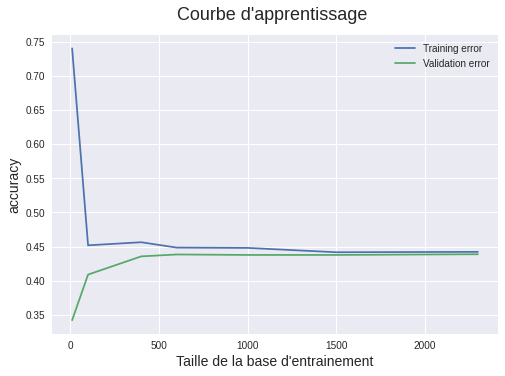

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('accuracy', fontsize=14)
plt.xlabel('Taille de la base d\'entrainement', fontsize=14)
plt.title("Courbe d'apprentissage ", fontsize=18, y=1.03)
plt.legend()

SUMMARY : 
1. Model with Random Forest has a better accuracy but a slight accuracy : 0.475
2. Model with linear SVC has no overfitting and the same scores for both training and test and a good accuracy : 0.47
3. Bookmakers (with a lot of data) reaches an accuracy of 0.55
3. Linear SVC, as in the paper, seems to be the best one
4. Prediction could be better with more data to build an accurate Xg model


In [120]:
df_xg_nu.columns

Index(['match_id', 'season', 'league', 'team_1', 'team_2', 'Xg_team_1',
       'Xg_team_2', 'day', 'elo_offensive_1', 'elo_defensive_1',
       'elo_home_offensive_1', 'elo_away_offensive_1', 'elo_home_defensive_1',
       'elo_away_defensive_1', 'elo_offensive_2', 'elo_defensive_2',
       'elo_home_offensive_2', 'elo_away_offensive_2', 'elo_home_defensive_2',
       'elo_away_defensive_2', 'outcome', 'home_1'],
      dtype='object')

In [121]:
dfg=df_xg_nu[features]

In [122]:
dfg

,elo_offensive_1,elo_defensive_1,elo_home_offensive_1,elo_home_defensive_1,elo_offensive_2,elo_defensive_2,elo_away_offensive_2,elo_away_defensive_2,outcome
0,1.789474,1.078947,1.894737,0.578947,0.868421,1.263158,0.789474,1.315789,1
1,0.877193,1.938596,1.070175,1.596491,1.868421,0.710526,1.473684,0.842105,2
2,0.877193,1.938596,1.070175,1.596491,1.605263,1.026316,1.210526,1.052632,N
3,2.657895,1.315789,2.789474,0.947368,1.421053,1.210526,1.157895,1.210526,1
4,1.684211,1.131579,1.526316,1.105263,1.421053,1.421053,1.105263,1.473684,2
...,...,...,...,...,...,...,...,...,...
5777,-7.738215,1.487629,-4.418865,3.898625,-1.767979,1.830034,-2.491581,3.044283,1
5778,-9.938431,0.999699,-3.458224,0.711515,-1.136274,-1.182321,-2.603180,-2.417742,1
5779,-0.053879,1.990638,1.491483,1.417090,0.943314,-0.481397,0.369924,1.771242,2
5780,11.162541,-2.431827,5.869143,-1.978562,-12.094066,2.001547,-5.073281,1.047723,1


In [123]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils


visible = Input(shape=(feat.shape[1],))
hidden1 = Dense(500, activation='relu')(visible)
hidden2 = Dense(100, activation='relu')(hidden1)
hidden3 = Dense(50, activation='relu')(hidden2)
hidden4 = Dense(20, activation='relu')(hidden3)
output = Dense(3, activation='softmax')(hidden4)

clf = Model(inputs=visible, outputs=output)
print(clf.summary())

from keras import metrics
from keras import losses
from keras import optimizers

clf.compile(optimizer=optimizers.Adam(), 
              loss=losses.CategoricalCrossentropy(), 
              metrics=[metrics.Precision(), metrics.Recall()])
train_predict_nn(clf, features, outcomes)

NameError: ignored

In [ ]:
def train_predict_nn(clf, data, outcomes):
    le = LabelEncoder()
    y_outcomes = le.fit_transform(outcomes)
    y_outcomes = np_utils.to_categorical(y_outcomes)
    
    y_predict = train_model_nn(clf, data, y_outcomes)
    
    y_predict_reverse = [np.argmax(y, axis=None, out=None) for y in y_predict]
    y_predict_decoded = le.inverse_transform(y_predict_reverse)
    predict_metrics(outcomes, y_predict_decoded)


In [ ]:
features

In [ ]:
df_xg_nu